# IKEA Furniture - Comparing different Classfiication Methods

## Outline
- [Motivation](#Motivation)
- [Imports](#Imports)
- [Data Analysis](#Data-Analysis)
    - [Import IKEA Furniture Data Set](#Import-IKEA-Furniture-Data-Set)
    - [Data Visualization](#Data-Visualization)
    - [Targets and Features](#Targets-and-Features)
    - [Correlation](#Correlation)
    - [Data Cleaning](#Data-Cleaning)
    - [Prepare Data for Prediction with a Tree-Based Algorithm](#Prepare-Data-for-Prediction-with-a-Tree-Based-Algorithm)
- [Decision Tree](#Decision_Tree)
    - [First Version of the Decision Tree](#First-Version-of-the-Decision-Tree)
    - [First Improvements of the Decision Tree](#First-Improvements-of-the-Decision-Tree)
    - [Final Version of the Decision Tree](#Final-Version-of-the-Decision-Tree)
    - [Further Investigations of the Decision Tree](#Further-Investigations-of-the-Decision-Tree)
- [Random Forest](#Random-Forest)
    - [Create a First Version of a Random Forest](#Create-a-First-Version-of-the-Random-Forest)
    - [First Improvements of the Random Forest](#First-Improvements-of-the-Random-Forest)
    - [Final Version of the Random Forest](#Final-Version-of-the-Random-Forest)
    - [Further Investigations of the Random Forest Model](#Further-Investigations-of-the-Random-Forest-Model)
- [Boosting](#Boosting)
    - [Create a First Version of Boosting](#Create-a-First-Version-of-Boosting)
    - [First Improvements of Boosting](#First-Improvements-of-Boosting)
    - [Final Version of Boosting](#Final-Version-of-Boosting)
    - [Further Investigations of Boosting Model](#Further-Investigations-of-Boosting-Model)
- [Conclusion and Remarks](#Conlcusion-and-Remarks)

## Motivation

We are given a dataset which collects the features of 2962 furniture items sold by IKEA. The goal of this project is to use classification methods in order to predict the category a new item belongs to.

As part of this project, different classification methods are tested and their performance is examined. 
Common classificaiton methods are the Logistic Regression, K-Nearest-Neighbour, Decision Tree or Support Vector Machines just to name a few. However, while many different classification methods exist, in the scope of this project the focus was set on tree-based classfication methods.

Tree-based classification methods are used to predict a qualitative reponse for an observation based on a sequence of splitting rules. The splitting rules are summarized in a tree. An advantage of decision trees is that they are easy to understand and interpret. In addition, decision trees can handle both numerical and categorical data. This will be usefull since the IKEA furniture dataset contains both numerical and categorical data. However, a disadvatage of decision trees is that they can create complex trees that do not generalise well. Furthermore, the trees do not have the same level of prediction accuracy as some other classification methods do.

Therefore, in order to construct more powerful prediction models, in a second step, random forests and boosting is explored. Both random forest and boosting use trees as building blocks in their models.

## Imports

In [119]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns

import graphviz

from matplotlib import pyplot as plt
from IPython.display import Image, display


%matplotlib inline
plt.style.use('ggplot') 
sns.set(style="white")

## Data Analysis

In a first step the given raw dataset is closer examined. The main goal of the data analysis is to identify useful information and to better understand the dataset at hand. In order to prepare the raw-data for later use, steps of cleansing and transforming are included as well. 

### Import IKEA Furniture Data Set

In [120]:
#read the data and delete the index of entry
IKEA_df = pd.read_csv('Data/IKEA_SA_Furniture_Web_Scrapings_sss.csv')
IKEA_df = IKEA_df.drop(IKEA_df.columns[0],axis =1)
IKEA_df.head(5)

item_id                   name       category   price     old_price  \
0  90420332               FREKVENS  Bar furniture   265.0  No old price   
1    368814              NORDVIKEN  Bar furniture   995.0  No old price   
2   9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0  No old price   
3  80155205                   STIG  Bar furniture    69.0  No old price   
4  30180504                NORBERG  Bar furniture   225.0  No old price   

   sellable_online                                               link  \
0             True  https://www.ikea.com/sa/en/p/frekvens-bar-tabl...   
1            False  https://www.ikea.com/sa/en/p/nordviken-bar-tab...   
2            False  https://www.ikea.com/sa/en/p/nordviken-nordvik...   
3             True  https://www.ikea.com/sa/en/p/stig-bar-stool-wi...   
4             True  https://www.ikea.com/sa/en/p/norberg-wall-moun...   

  other_colors                                  short_description  \
0           No           Bar table, in/outdoor,          51x51 cm   
1           No                      Bar table,          140x80 cm   
2           No                         Bar table and 4 bar stools   
3          Yes            Bar stool with backrest,          74 cm   
4           No          Wall-mounted drop-leaf table,         ...   

               designer  depth  height  width  
0  Nicholai Wiig Hansen    NaN    99.0   51.0  
1     Francis Cayouette    NaN   105.0   80.0  
2     Francis Cayouette    NaN     NaN    NaN  
3         Henrik Preutz   50.0   100.0   60.0  
4        Marcus Arvonen   60.0    43.0   74.0

In [121]:
m = IKEA_df.shape[0]
n = IKEA_df.shape[1]
print('The dataset contains '+str(m)+' samples and '+str(n-1)+' features including the target-feature \'category\'')

The dataset contains 3694 samples and 12 features including the target-feature 'category'


### Data Visualization 

In the following the feature-name together with its data-type is listed (including the target-feature category). Note that the data-set contains both numerical as well as categorical data. 

In [122]:
# data type  
IKEA_df.dtypes

item_id                int64
name                  object
category              object
price                float64
old_price             object
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

Furthermore, some features are missing data:

In [123]:
IKEA_df.count() 

max_count = max(IKEA_df.count())

missing_data = []
for i in range(len(IKEA_df.count())):
        if IKEA_df.count()[i] < max_count:
            missing_data.append(i)
            
features = list(IKEA_df.count()[missing_data].index)
print('The data of the following ' +str(len(features))+ ' features is incomplete: ' +str(features))

The data of the following 3 features is incomplete: ['depth', 'height', 'width']


### Targets and Features
In the following an exploratory data analysis of the different features is performed. The main goal is to gather a better understanding of the dataset at hand. For that, each feature and its properties are examined individually.

#### item_id 

In [124]:
nun_id =  IKEA_df['item_id'].nunique()
print('Overall, ' + str(nun_id)+' unique item-id\'s exist.')
if nun_id <  m:
    print('However, not every item has a unique item-ID. Either some items share an item-ID or it might one and the same item.')

Overall, 2962 unique item-id's exist.
However, not every item has a unique item-ID. Either some items share an item-ID or it might one and the same item.


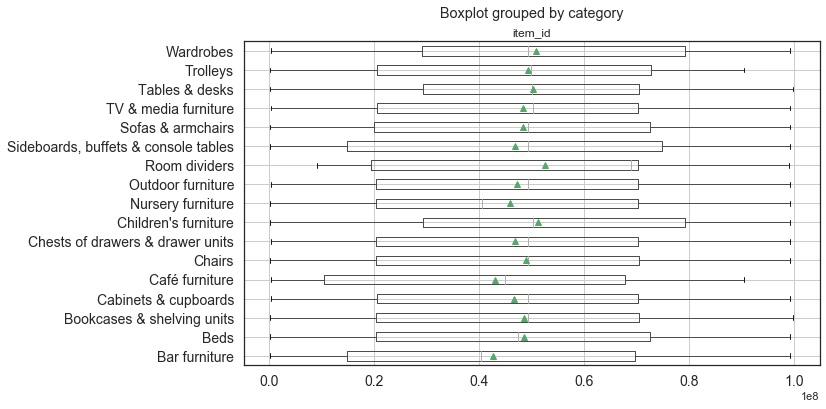

In [125]:
ax0 = IKEA_df.boxplot(column='item_id',by='category',vert=False, figsize=(10,6), fontsize =14,showmeans =True)
ax0.set_xlabel('')
ax0.figure.savefig('Figures/Data_Analysis/item_id_boxplot.png',bbox_inches = 'tight')

The item_id is a number consisting of 5 to 8 digits. From the boxplot we can derive, that for most categories approximately 50% of the items  are taking a value between 2e7 and 7e7. Thus, item_id probably will not not give strong evidence of the category an item belongs to.  

#### name

In [126]:
nun =  IKEA_df['name'].nunique()
#print(IKEA_df['category'].unique())
print('There are ' + str(nun) + ' unique names in total.' )

There are 607 unique names in total.


In [127]:
name_df =  IKEA_df.groupby('category').agg({'name':'nunique', 'category':'size'})
name_df.columns=['n_uname','size']

In [128]:
name_df['uname [%]'] = name_df['n_uname']/ name_df['size']
name_df.sort_values(['uname [%]'], ascending=False)

n_uname  size  uname [%]
category                                                      
Trolleys                                   20    28   0.714286
Sideboards, buffets & console tables       12    23   0.521739
Bar furniture                              24    47   0.510638
Café furniture                             12    26   0.461538
Chairs                                    222   481   0.461538
Tables & desks                            245   612   0.400327
Room dividers                               5    13   0.384615
Beds                                       76   208   0.365385
TV & media furniture                       54   190   0.284211
Children's furniture                       34   124   0.274194
Chests of drawers & drawer units           33   125   0.264000
Cabinets & cupboards                       67   292   0.229452
Outdoor furniture                          45   216   0.208333
Nursery furniture                          19    97   0.195876
Wardrobes                                  38   236   0.161017
Bookcases & shelving units                 83   548   0.151460
Sofas & armchairs                          56   428   0.130841

In general, the feature 'name' can help determine the catogory. The feature 'name' might play a very important role for the prediction of category 'Sofas & armchairs' since close to 97% of the samples do not have an unique name. On the contrary, for category 'trolleys' the feature 'name' might not be as helpful as 70% of the samples have a unique name. 

#### category

In [129]:
nun =  IKEA_df['category'].nunique()
type_df = IKEA_df.groupby('category').size().reset_index(name='size').sort_values(['size'], ascending=False) 
print('There are ' + str(nun) + ' categories in total:\n')
list(type_df['category'])

There are 17 categories in total:



['Tables & desks',
 'Bookcases & shelving units',
 'Chairs',
 'Sofas & armchairs',
 'Cabinets & cupboards',
 'Wardrobes',
 'Outdoor furniture',
 'Beds',
 'TV & media furniture',
 'Chests of drawers & drawer units',
 "Children's furniture",
 'Nursery furniture',
 'Bar furniture',
 'Trolleys',
 'Café furniture',
 'Sideboards, buffets & console tables',
 'Room dividers']

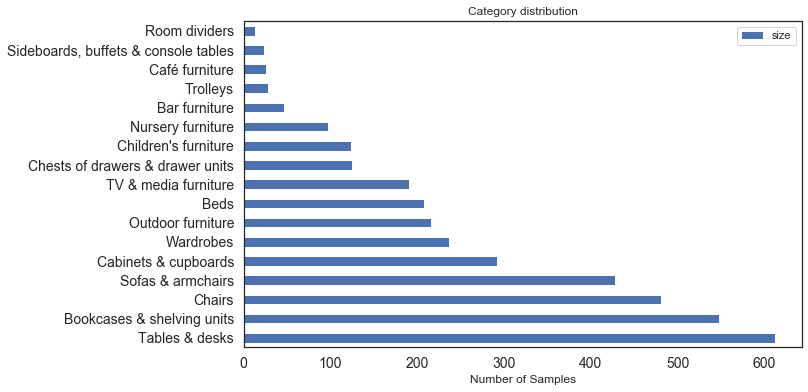

In [130]:
ax1 = type_df.set_index('category').plot.barh(rot=0, title='Category distribution',color = 'b',figsize=(10,6), fontsize=14)
ax1.set_xlabel("Number of Samples")
ax1.set_ylabel('')
ax1.figure.savefig('Figures/Data_Analysis/category_distribution.png',bbox_inches = 'tight')

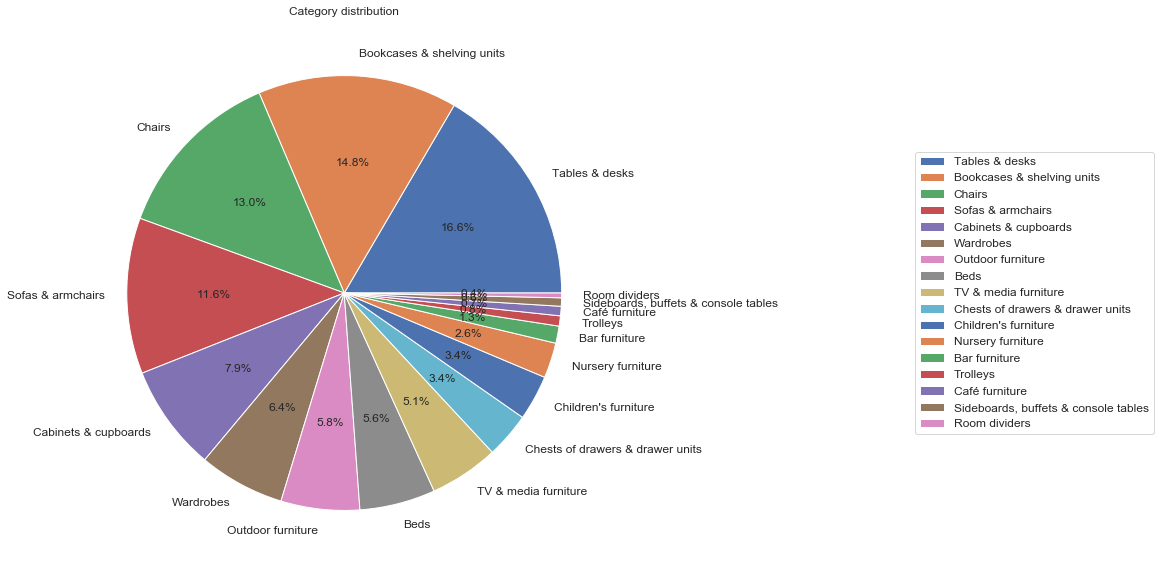

In [131]:
ax = type_df.set_index('category').plot.pie(title='Category distribution', y='size',figsize=(10,10), autopct='%1.1f%%',fontsize=12)
ax.set_ylabel('')
ax.legend(bbox_to_anchor=(2,0.5), loc="right", fontsize=12)
ax.figure.savefig('Figures/Data_Analysis/category_plotpie.png',bbox_inches = 'tight')

The category distribution is visulized above as a bar graph and a pie chart. From that, the follwoing observations can be made:\
Overall, almost 17% of the data-samples belong to the category 'Tables & desks', followed by the category 'Bookcases & sheiving units' with approx. 15% and the category 'Chairs' with 13%.\
On the contrary, the data-samples of the categories 'Room dividers', 'Sideboards', 'buffets & console tables', 'Cafe furniture' and 'Trolleys' accounts for less than 1%. Thus, it can be concluded, that the classification task itself is quite imbalanced. Hence, it might be necessary to replicate data-samples of the categories mentioned above, where the sample size is extremely small.

#### price

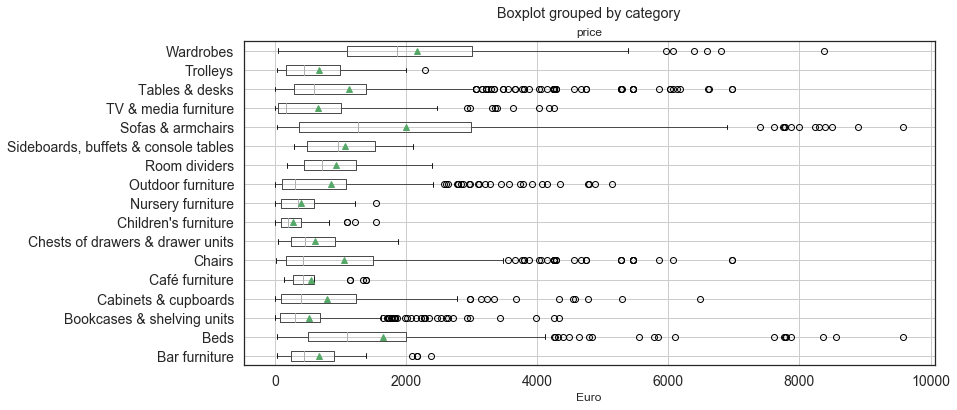

In [132]:
ax2 = IKEA_df.boxplot(column='price',by='category',vert=False, figsize=(12,6), fontsize =14,showmeans =True)
ax2.set_xlabel('Euro')
ax2.figure.savefig('Figures/Data_Analysis/price_boxplot.png',bbox_inches = 'tight')

As shown above in the boxplot of price, the furniture of the category 'Wardrobes' is the most expensive, while the children's furnitures is the cheapest. The category 'Sofa & armchairs' has has the largest range in price from approximately 250€ up to 70.000€, while the ourliers can reach up to 90.000€. The category 'Cafe furniture' has the most "stable" price. The price area (Interquartile Range of price) of some categories do overlap. Still, in general it seems fair to say, that price can be a very useful feature in order determine the category of an item.

#### old-price

In [133]:
t = IKEA_df[IKEA_df['old_price'].str.contains('No old price')]['item_id'].count() /m
print( str( round(t,4)*100) + '% of feature old_price is \'No old price\'.' )

82.3% of feature old_price is 'No old price'.


It is  impossible to recover this data. Thus, the feature 'old_price' might not be helpful in order to determine the category and can therefore be ignored for training. 

#### sellable_online

In [134]:
t = IKEA_df[IKEA_df['sellable_online'] == True]['item_id'].count()/m
print( str( round(t,4)*100) + '% of feature \'sellable_online\' is \'True\'.' )

99.24% of feature 'sellable_online' is 'True'.


This means that the vast majority of items can be sold online. Because this feature is identical in most cases, most likely it cannot help determine the category of an item and therefore is deleted for training.

#### other_colors

In [135]:
t = IKEA_df[IKEA_df['other_colors'].str.contains('Yes')]['item_id'].count()/m
print( str( round(t,4)*100) + '% of feature other_colors is \'Yes\'.' )

40.93% of feature other_colors is 'Yes'.


#### designer

In [136]:
nun_designer =  IKEA_df['designer'].nunique()
#print(IKEA_df['designer'].unique())
print('There are ' + str(nun_designer) + ' different designers in total.' )

There are 381 different designers in total.


In [137]:
designer_df = IKEA_df.groupby('designer').size().reset_index(name='count').sort_values(['count'], ascending=False)
designer_df['count%'] = round(designer_df['count'] *100/m ,2) 
designer_df.head(5)

designer  count  count%
192       IKEA of Sweden    828   22.41
138      Ehlén Johansson    161    4.36
163    Francis Cayouette    151    4.09
344         Ola Wihlborg    134    3.63
279  K Hagberg/M Hagberg    122    3.30

As shown in the table above, 22% of the items are not designed by a sepecific designer. The designer which designs most items is Ehlén Johanssons. However, Ehlén Johanssons only acount for about 4% in dataset. Ehlén Johanssons is closely follwoed by the designer Francis Cayoutte who accounts for approx. 4% of the designs. 

In [138]:
t = designer_df[designer_df['count']< 2].shape[0]
print(str(t)+ ' of ' + str(nun_designer)+' designers design just 1 items in dataset.\n')

t = designer_df[designer_df['count']< 5].shape[0]
print(str(t)+ ' of ' + str(nun_designer)+' designers design less than 5 items in dataset.\n')

t  = designer_df[designer_df['count']< 10].shape[0]
print(str(t)+ ' of ' + str(nun_designer)+' designers design less than 10 items in dataset.\n')

139 of 381 designers design just 1 items in dataset.

278 of 381 designers design less than 5 items in dataset.

320 of 381 designers design less than 10 items in dataset.



In [139]:
IKEA_df['designer_len'] = IKEA_df['designer'].str.len() 
IKEA_df['designer_len'].describe()

count    3694.000000
mean       33.755820
std        86.016629
min         3.000000
25%        14.000000
50%        15.000000
75%        28.000000
max      1261.000000
Name: designer_len, dtype: float64

In [140]:
t = IKEA_df[IKEA_df['designer_len'] > 40].shape[0] 
print(str( round(t*100/m,2)) +'% samples have actually text of long description in feature designer' )

7.26% samples have actually text of long description in feature designer


We find that some entries in 'desinger' contain a more detailed description of the furniture itself instead of the designers name. We could replace those entries with 'designer unknowm', however,  this might be misleading later on as it could be understood by the algorithm as if the furniture was designed by one and the same person (called 'designer unknown') when instead the designer is not known.\
Moreover, the observation can be made that furniture of the same category might have the same description for the feature 'designer'. But considering those mistakes only acount for approximately 7% of the entire dataset, one can also just keep the original data.

#### Let's take a closer look at the TOP3 furniture-designers:
1. IKEA of Schweden (22.41%)
2. Ehlén Johansson (4.36%)
3. Francis Cayouette (4.09%)

*1. IKEA of Schweden (22.41%)*

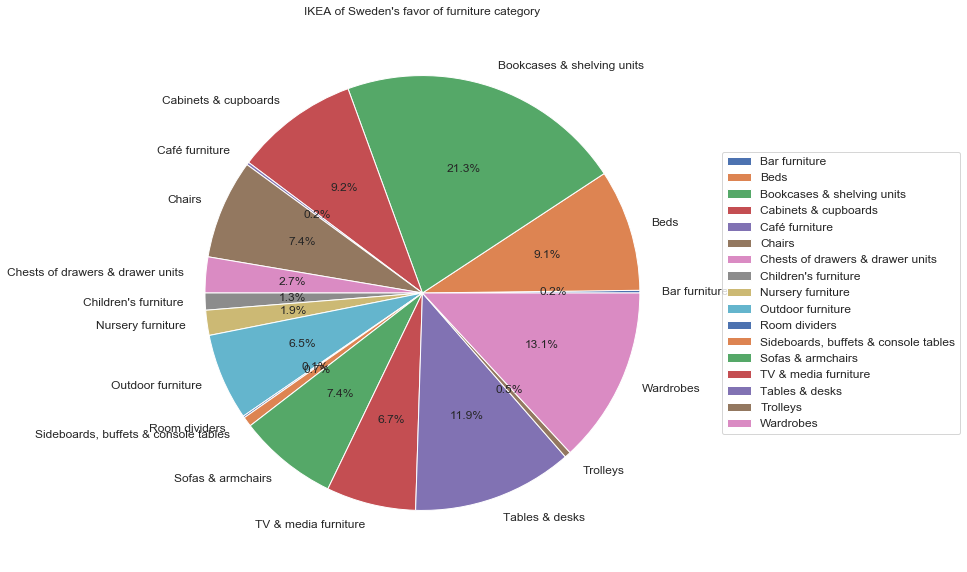

In [141]:
df1 = IKEA_df[IKEA_df['designer'].str.contains('IKEA of Sweden')].groupby('category')['item_id'].count() \
                                    .reset_index(name = 'count')
axd1 = df1.set_index('category').plot.pie(title='IKEA of Sweden\'s favor of furniture category', y='count',figsize=(10,10), \
                                          autopct='%1.1f%%', fontsize=12, legend = None)
axd1.set_ylabel('')
axd1.legend(bbox_to_anchor=(1.5,0.5), loc="right", fontsize=12)
axd1.figure.savefig('Figures/Data_Analysis/TOP1_designer.png',bbox_inches = 'tight')

'IKEA of Sweden' covers all 17  furniture catogeries. However, most designs are for category 'Bookcases & shelving units' accounting for a little over 20% of all designs.

*2. Ehlén Johansson (4.36%)*

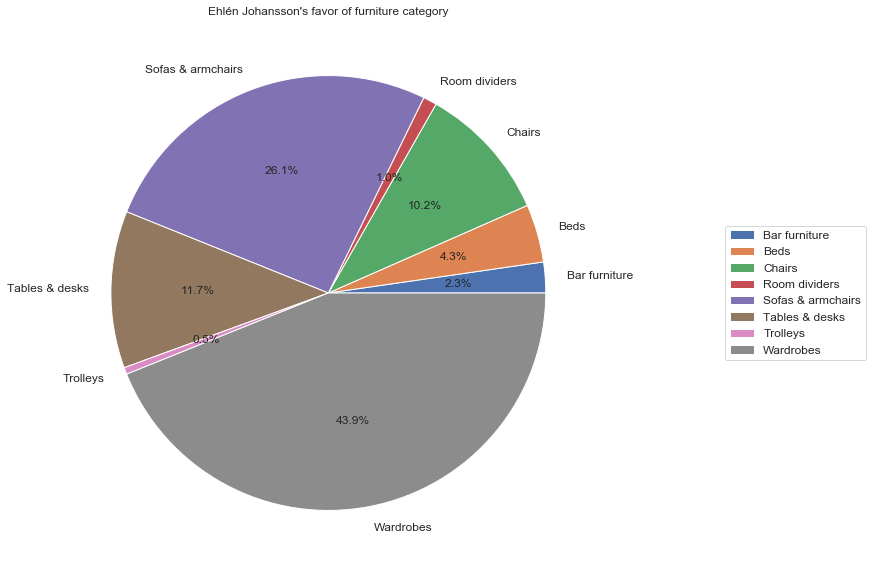

In [142]:
df2 = IKEA_df[IKEA_df['designer'].str.contains('Ehlén Johansson')].groupby('category')['item_id'].count() \
                                    .reset_index(name = 'count')
axd2 = df2.set_index('category').plot.pie(title='Ehlén Johansson\'s favor of furniture category', y='count',figsize=(10,10), \
                                          autopct='%1.1f%%', fontsize=12, legend = None)
axd2.set_ylabel('')
axd2.figure.savefig('Figures/Data_Analysis/TOP2_designer.png',bbox_inches = 'tight')
axd2.legend(bbox_to_anchor=(1.5,0.5), loc="right", fontsize=12)

Designer Ehlén Johansson seems to favor designing for the category 'Wardrobes' (over 40%), followed by category 'Sofas & armchairs' with approcimately 26%.

In [143]:
t1 = IKEA_df[IKEA_df['category'].str.contains('Wardrobes')]['item_id'].count() 
t2 = IKEA_df[IKEA_df['category'].str.contains('Wardrobes') & IKEA_df['designer'].str.contains('Ehlén Johansson')]['item_id'].count() 
print('About ' +str(round(t2/t1, 4)*100)+ '% of the items of category \'Wardrobes\' are designed by Ehlén Johansson (including the cases IKEA of Sweden/Ehlén Johansson and Ehlén Johansson/IKEA of Sweden).')

About 73.31% of the items of category 'Wardrobes' are designed by Ehlén Johansson (including the cases IKEA of Sweden/Ehlén Johansson and Ehlén Johansson/IKEA of Sweden).


*3. Francis Cayouette (4.09%)*

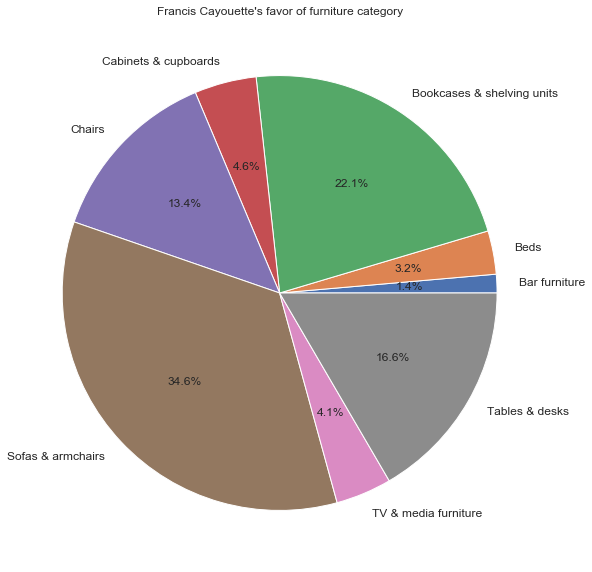

In [144]:
df3 = IKEA_df[IKEA_df['designer'].str.contains('Francis Cayouette')].groupby('category')['item_id'].count() \
                                    .reset_index(name = 'count')
axd3 = df3.set_index('category').plot.pie(title='Francis Cayouette\'s favor of furniture category', y='count',figsize=(10,10),\
                                          autopct='%1.1f%%', fontsize=12, legend = None)
axd3.set_ylabel('')
#axd3.legend(bbox_to_anchor=(1.5,0.5), loc="right", fontsize=12)
axd3.figure.savefig('Figures/Data_Analysis/TOP3_designer.png',bbox_inches = 'tight')

Designer Francis Cayouette favors designing 'Sofas & armchairs' (approximately 35%), followed by the category 'Bookcases & sehlving units' with approximately 22% and category 'Tables % desks' accounting for almost 17%. 

In [145]:
t1 = IKEA_df[IKEA_df['category'].str.contains('Sofas & armchairs')]['item_id'].count() 
t2 = IKEA_df[IKEA_df['category'].str.contains('Sofas & armchairs') & IKEA_df['designer'].str.contains('Francis Cayouette')]['item_id'].count() 
print('Overall, around ' +str(round(t2/t1, 4)*100)+ '% of the items in category \'Sofas & armchairs\' are designed by Francis Cayouette.')

Overall, around 17.52% of the items in category 'Sofas & armchairs' are designed by Francis Cayouette.


#### depth, width,  height

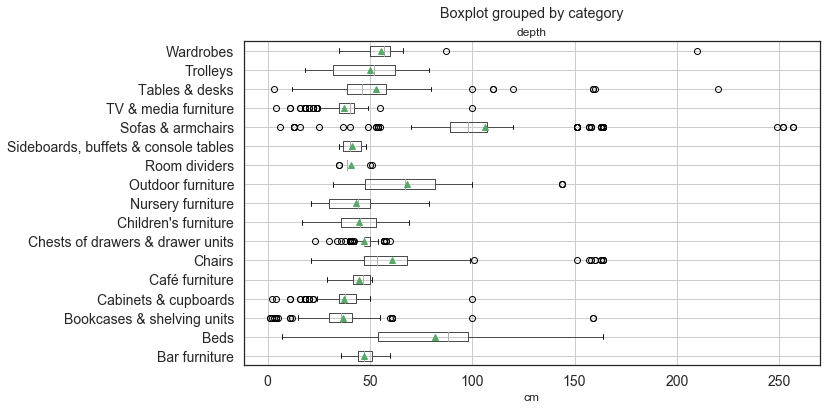

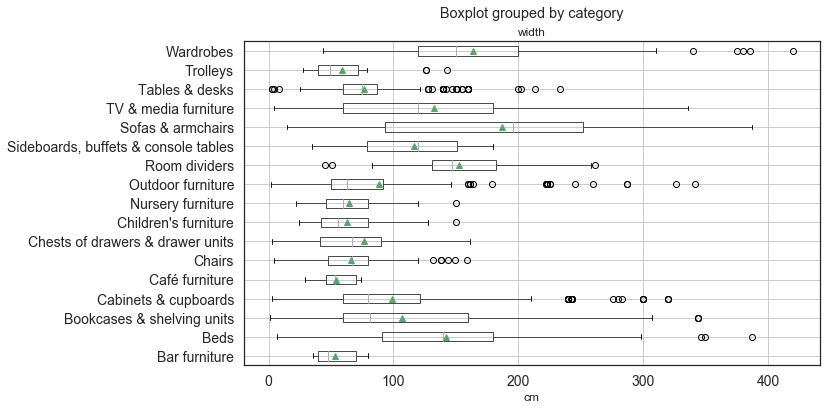

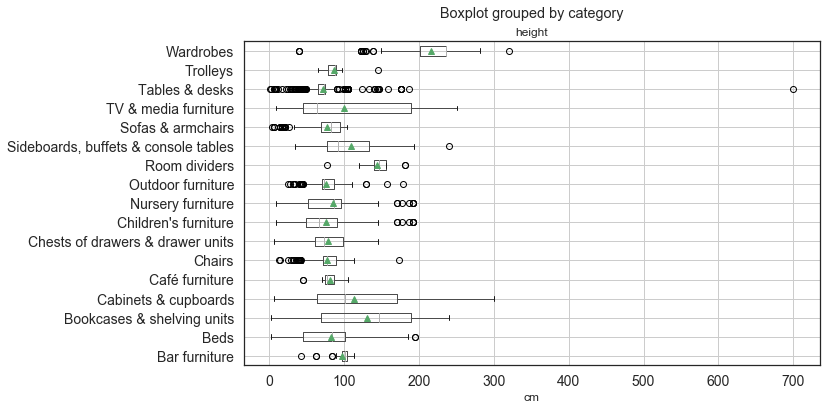

In [146]:
# depth boxplot
ax3 = IKEA_df.boxplot(column='depth',by='category',vert=False, figsize=(10,6), fontsize =14,showmeans =True)
ax3.set_xlabel('cm')
ax3.figure.savefig('Figures/Data_Analysis/depth_boxplot.png',bbox_inches = 'tight')
# width boxplot
ax5 = IKEA_df.boxplot(column='width',by='category',vert=False, figsize=(10,6), fontsize =14,showmeans =True)
ax5.set_xlabel('cm')
ax5.figure.savefig('Figures/Data_Analysis/width_boxplot.png',bbox_inches = 'tight')
# height boxplot
ax4 = IKEA_df.boxplot(column='height',by='category',vert=False, figsize=(10,6), fontsize =14,showmeans =True)
ax4.set_xlabel('cm')
ax4.figure.savefig('Figures/Data_Analysis/height_boxplot.png',bbox_inches = 'tight')

Generally, the size-features 'depth', 'width', 'height' vary a lot throughout the different categories. This is the case in particular for the feature 'depth'. Therefore it is assumed, that the size-features might play an important role in predicting an items category. 

#### link, short_description

The features 'link' and 'short_desctiption' can be understood literally. Both features 'link' and 'short_description' are different for the individual items and uncorrelated to the category. Therefore, 'link' and 'short_description' will be ignored for the training.\
However, it should not go unnoted that 'short_description' sometains contains size-data,  which is not scrapped and assgined correctly. We can make use of this and recover some missing data (NaN) for 'depth', 'width' and 'height'. Unfortunately, in most cases this is technically very complicated. Furthermore, both features 'link' and 'short_description' contain key words, which would indicate  the items category straight away. It might be cheating to make use of that, while at the same time it would be extremely difficult to do so.

### Correlation

We would like to check the colinerity of numerical (including boolean) features. We can encode the nominal features as integer values by using 'factorize'.\ 
Although, this can be misleadings in some way, at this point we just want to have an idea of the correlation between the features. In case of training an algorithm that does not understand nominal features, we might use the one-hot encoding to avoid misunderstandings caused by numeric values. However, this can lead to a quite high computational cost. For example, for 370 different designers, one-hot encoding will create 9 more features, respectively, taking value 0/1 to present the feature designer.

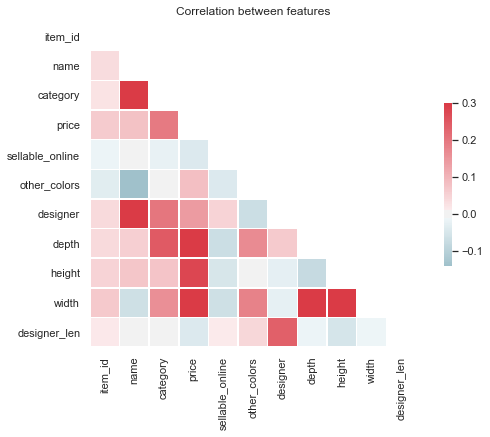

In [147]:
corr_df = IKEA_df.copy()

corr_df['category'] = pd.factorize(corr_df['category'])[0] + 1
corr_df['name'] = pd.factorize(corr_df['name'])[0] + 1
corr_df['sellable_online'] = pd.factorize(corr_df['sellable_online'])[0] + 1
corr_df['other_colors'] = pd.factorize(corr_df['other_colors'])[0] + 1
corr_df['designer'] = pd.factorize(corr_df['designer'])[0] + 1

# correlation / scatter matrix here
corr = corr_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation between features')
ax.figure.savefig('Figures/Data_Analysis/corr.png',bbox_inches = 'tight')

As shown by the analysis of the individual features above, 'depth' and 'price' play a relatively important role in determining the category of an item, whereas the features 'sellable_online' and 'other_colors' show a low correlation to the category. 
The feature 'price' also shows a relatively high correlation to the item-category as well as to the items depth, height and width. The features 'name' and 'designer' also show a relatively high correlation, indicating the colinearity of the features. This might result in bad predicitons in certain algorithms. Still, the correlation between features (including the target category) are not on a very high level as in all cases the correlation is below the value 0.3.

### Data Cleaning

The goal of the data cleaning is to detect and then correct corrupt or inaccurate data as well as prepare the data for later use.\
First of, the feature 'other_colors' is transformed from an object to a boolean:

In [148]:
IKEA_df['other_colors'] = IKEA_df['other_colors'].map({'Yes': True, 'No': False})

Rather as a coincidence we noticed that the designer 'Ehlén Johansson' is sometimes listed as 'IKEA of Sweden/Ehlén Johansson' and other times as 'Ehlén Johansson/IKEA of Sweden'. Because this seems to be one and the same person, the two were merged and saved as 'Ehlén Johansson/IKEA of Sweden'.

In [149]:
s1 = IKEA_df[IKEA_df['designer'].str.contains('IKEA of Sweden/Ehlén Johansson')].shape[0]
s2 = IKEA_df[IKEA_df['designer'].str.contains('Ehlén Johansson/IKEA of Sweden')].shape[0]
l = IKEA_df['designer'].shape[0]

print('Ehlén Johansson accounts for ' +str(s1)+ ' designs as \'IKEA of Sweden/Ehlén Johansson\' and for ' +str(s2)+ ' designs as \'Ehlén Johansson/IKEA of Sweden\'.')
print('Thus, in total ' +str(s1+s2)+ ' of the designs are from the desginer Ehlén Johansson. This means, in reality Ehlén Johansson accounts for ' +str(round((s1+s2)/l,4)*100)+ '% of the designs.')

Ehlén Johansson accounts for 79 designs as 'IKEA of Sweden/Ehlén Johansson' and for 86 designs as 'Ehlén Johansson/IKEA of Sweden'.
Thus, in total 165 of the designs are from the desginer Ehlén Johansson. This means, in reality Ehlén Johansson accounts for 4.47% of the designs.


In [150]:
IKEA_df['designer']= np.where(IKEA_df['designer'].str.contains('IKEA of Sweden/Ehlén Johansson'),  'Ehlén Johansson/IKEA of Sweden', IKEA_df.designer)

Next, the cells containing 'NaN' values are investigated more closely.

In [151]:
# determine where data is missing (cell is NaN)
shape_NaN = IKEA_df[IKEA_df.isnull().any(axis=1)].shape 
IKEA_df[IKEA_df.isnull().any(axis=1)].head(4)

item_id                   name       category   price     old_price  \
0  90420332               FREKVENS  Bar furniture   265.0  No old price   
1    368814              NORDVIKEN  Bar furniture   995.0  No old price   
2   9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0  No old price   
7  60155602                DALFRED  Bar furniture   195.0  No old price   

   sellable_online                                               link  \
0             True  https://www.ikea.com/sa/en/p/frekvens-bar-tabl...   
1            False  https://www.ikea.com/sa/en/p/nordviken-bar-tab...   
2            False  https://www.ikea.com/sa/en/p/nordviken-nordvik...   
7             True  https://www.ikea.com/sa/en/p/dalfred-bar-stool...   

   other_colors                                 short_description  \
0         False          Bar table, in/outdoor,          51x51 cm   
1         False                     Bar table,          140x80 cm   
2         False                        Bar table and 4 bar stools   
7         False                      Bar stool,          63-74 cm   

               designer  depth  height  width  designer_len  
0  Nicholai Wiig Hansen    NaN    99.0   51.0            20  
1     Francis Cayouette    NaN   105.0   80.0            17  
2     Francis Cayouette    NaN     NaN    NaN            17  
7           Sarah Fager   50.0     NaN   50.0            11

It seems like data is only missing regarding the item-size (depth, height, width). Let's check if that is truely the case:

In [152]:
size = ['depth','height','width'] 
shape_size = IKEA_df[IKEA_df[size].isnull().any(axis=1)].shape 
s = IKEA_df[IKEA_df[IKEA_df.columns[~IKEA_df.columns.isin(size)]].isnull().any(axis=1)].shape
if s[0] == 0:
    print('The assumption made above is correct. All \'NaN\'-entries can be found in the rows \'depth\', \'height\', \'width\' describing the item-size.')

The assumption made above is correct. All 'NaN'-entries can be found in the rows 'depth', 'height', 'width' describing the item-size.


In [153]:
IKEA_df[IKEA_df[size].isnull().all(axis=1)].head(4)

item_id                   name       category   price     old_price  \
2    9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0  No old price   
9   69304221    EKEDALEN / EKEDALEN  Bar furniture  2176.0      SR 2,375   
28  29297227    STENSELE / NORRARYD  Bar furniture  1340.0  No old price   
32  19297275    NORRÅKER / NORRÅKER  Bar furniture  1266.0      SR 1,385   

    sellable_online                                               link  \
2             False  https://www.ikea.com/sa/en/p/nordviken-nordvik...   
9              True  https://www.ikea.com/sa/en/p/ekedalen-ekedalen...   
28             True  https://www.ikea.com/sa/en/p/stensele-norraryd...   
32             True  https://www.ikea.com/sa/en/p/norraker-norraker...   

    other_colors                                  short_description  \
2          False                         Bar table and 4 bar stools   
9          False                         Bar table and 4 bar stools   
28         False                         Bar table and 2 bar stools   
32         False          Bar table and 2 bar stools,          7...   

                         designer  depth  height  width  designer_len  
2               Francis Cayouette    NaN     NaN    NaN            17  
9                 Ehlén Johansson    NaN     NaN    NaN            15  
28  Nike Karlsson/Maja Ganszyniec    NaN     NaN    NaN            29  
32          J Karlsson/N Karlsson    NaN     NaN    NaN            21

#### NaN in size data

By comparing the given dataset to the product size published on the website, the conclusion can be made, that there are several main reasons as to why some of the data regarding the item-size is missing.

First of, it seems that some data is not successfully scraped from the website. Because it is not recorded in the short description either it is impossible to recover the missing information regarding the item-size.
Second, some items represent a set of different furniture items. Therefore there is no product size in that sense.
Third, some items are variable in size. For example, an item can vary in its width, so instead of a a fix value, the width is a range.

Although some of the missing data could be scraped from the the short description as some size-data is recorded there. However, it is very difficult to extract the exact size for all items. The biggest problem is that it cannot be identified what numbers respond to the items depth, height and width. Furthermore, the data in the short description often is incomplete.

Last, there are some small items where the measurements ar taken in milimeters instead of centimeter. In addition, for some items a item-diameter is recorded in the short descritpion instead of the item-height.

In a first step, the size-data is separated from the short description. Then the size is split into the numeric value ('size_nounit') and its unit.

In [154]:
IKEA_df['size']= IKEA_df['short_description'].str.rsplit(',', n=1).str[1]
IKEA_df['short_description']= IKEA_df['short_description'].str.rsplit(',', n=1).str[0]

IKEA_df['unit'] = IKEA_df['size'].str.replace('\d+|-|x', ' ')
IKEA_df['size_nounit'] = IKEA_df['size'].str.replace('cm|mm', '')

The following will show, that indeed, 'height' is not given for the small items. In this case it is convenient to extract the diameter from the short description and replacing the NaN in height with the diamater. Additionally, the information given on the website indicates that the unit size-data for small items is in fact 'mm'. In the following, the unit for the small items will be corrected.  

In [155]:
IKEA_df[IKEA_df['unit'].str.contains('mm') & IKEA_df[size].isnull().any(axis=1)].shape

(132, 17)

In [156]:
IKEA_df[IKEA_df['unit'].str.contains('mm') & IKEA_df['height'].isnull()].shape

(132, 17)

In [157]:
IKEA_df['height'] = np.where(IKEA_df['unit'].str.contains('mm') , IKEA_df.size_nounit, IKEA_df.height)
IKEA_df['height'] = np.where(IKEA_df['unit'].str.contains('mm'), IKEA_df.height.astype(float)/10, IKEA_df.height)
IKEA_df['height'] = IKEA_df['height'].astype(float)

In [158]:
IKEA_df['depth'] = np.where(IKEA_df['unit'].str.contains('mm'), IKEA_df.depth.astype(float)/10, IKEA_df.depth)
IKEA_df['width'] = np.where(IKEA_df['unit'].str.contains('mm'), IKEA_df.width.astype(float)/10, IKEA_df.width)

For simplicity, the 'NaN'-cells in size-data are filled with either the mean or the median depending on the category and wether there are many outliers in size data (refer to the boxplot from earlier).\
In case there are many outliers resulting in the mean beeing significantly higher than the median, the NaN-cells are filled with the median.

In [159]:
dm =IKEA_df.groupby('category')['depth'].median().reset_index(name = 'depth_median')
dd = IKEA_df.groupby('category')['depth'].mean().reset_index(name = 'depth_mean')
hm = IKEA_df.groupby('category')['height'].mean().reset_index(name = 'height_mean')
hd = IKEA_df.groupby('category')['height'].median().reset_index(name = 'height_median')
wm= IKEA_df.groupby('category')['width'].median().reset_index(name = 'width_median')
wd =IKEA_df.groupby('category')['width'].mean().reset_index(name = 'width_mean')

In [160]:
IKEA_df = IKEA_df.join(dm.set_index('category'), on='category')
IKEA_df = IKEA_df.join(dd.set_index('category'), on='category')
IKEA_df = IKEA_df.join(hm.set_index('category'), on='category')
IKEA_df = IKEA_df.join(hd.set_index('category'), on='category')
IKEA_df = IKEA_df.join(wm.set_index('category'), on='category')
IKEA_df = IKEA_df.join(wd.set_index('category'), on='category')

In [161]:
IKEA_df['depth'] = np.where( (IKEA_df['depth'].isnull()) & (IKEA_df['category'].str.contains('Tables & desks')),  \
                              IKEA_df.depth_median, IKEA_df.depth )
IKEA_df['depth'] = np.where( (IKEA_df['depth'].isnull()) & (IKEA_df['category'].str.contains('Sofas & armchairs')),  \
                              IKEA_df.depth_median, IKEA_df.depth )        
IKEA_df['depth'] = np.where( (IKEA_df['depth'].isnull()) & (IKEA_df['category'].str.contains('Chairs')),  \
                              IKEA_df.depth_median, IKEA_df.depth )

In [162]:
IKEA_df['height'] = np.where( (IKEA_df['height'].isnull()) & (IKEA_df['category'].str.contains('TV & median furniture')),  \
                              IKEA_df.height_median, IKEA_df.height )
IKEA_df['height'] = np.where( (IKEA_df['height'].isnull()) & (IKEA_df['category'].str.contains('Sideboards, buffets,console tables')),  \
                              IKEA_df.height_median, IKEA_df.height )

In [163]:
IKEA_df['width'] = np.where((IKEA_df['width'].isnull()) & (IKEA_df['category'].str.contains('Wardrobes')),  \
                            IKEA_df.width_median, IKEA_df.width)
IKEA_df['width'] = np.where((IKEA_df['width'].isnull()) & (IKEA_df['category'].str.contains('Outdoor furniture')),  \
                            IKEA_df.width_median, IKEA_df.width)
IKEA_df['width'] = np.where((IKEA_df['width'].isnull()) & (IKEA_df['category'].str.contains('Carbinets & cupboards')),  \
                            IKEA_df.width_median, IKEA_df.width)
IKEA_df['width'] = np.where((IKEA_df['width'].isnull()) & (IKEA_df['category'].str.contains('Bookcases & shelving units')),  \
                            IKEA_df.width_median, IKEA_df.width)

In [164]:
IKEA_df['depth'] = np.where(IKEA_df['depth'].isnull(), IKEA_df.depth_mean, IKEA_df.depth)
IKEA_df['height'] = np.where(IKEA_df['height'].isnull(), IKEA_df.height_mean, IKEA_df.height)
IKEA_df['width'] = np.where(IKEA_df['width'].isnull(), IKEA_df.width_mean, IKEA_df.width)

### Prepare Data for Prediction with a Tree-Based Algorithm

Tree-based algorithms do not work with calculating distances. Therefore, it is sufficient to factorize the categorical features.

In [165]:
learn = ['item_id','name','category','price','sellable_online','other_colors','designer','depth','height','width' ]
learn_df = IKEA_df [learn]

In [166]:
#this cell gives warning about setting copy. This warning can be ignored in this project
learn_df['category_num'] = pd.factorize(learn_df['category'])[0] + 1
learn_df['name'] = pd.factorize(learn_df['name'])[0] + 1
learn_df['designer'] = pd.factorize(learn_df['designer'])[0] + 1

/Users/alissaganter/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alissaganter/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alissaganter/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [167]:
if learn_df[learn_df.isna().any(axis =1)]['item_id'].count() ==0:
    print('The dataframe does not contain any \'NaN\'-entries.')

The dataframe does not contain any 'NaN'-entries.


In [168]:
label = IKEA_df['category'].unique()
label = label.tolist()
print('labels:', label)

labels: ['Bar furniture', 'Beds', 'Bookcases & shelving units', 'Cabinets & cupboards', 'Café furniture', 'Chairs', 'Chests of drawers & drawer units', "Children's furniture", 'Nursery furniture', 'Outdoor furniture', 'Room dividers', 'Sideboards, buffets & console tables', 'Sofas & armchairs', 'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes']


In [169]:
t = learn_df.drop(columns = ['category','category_num']).shape[1]
print('There are '+str(t)+' features.')

There are 9 features.


After modifying and cleaning the data frame, it is suitable for tre-based algorithms.

## Decision Tree

We are exploring the method of Classification Trees in order to classify the IKEA Furniture Data-Set. One advantage of Trees is, that they can easily handle qualitative variables without the use of dummy variables. Therefor, this method seems to be particularly fitting for the classification problem at hand.

In [170]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time

### Test and Training Datasets

In order to create a first version of the decision tree the dataset is split into a training- and a test-dataset. In the following the function 'train_test_split' from sklearn will be used to split the dataset, whereas 2/3 of the data will be used for training and 1/3 for testing.\
In order to produce reproducible outputs across multiple function calls, the parameter 'random_state' is set to an integer value. At default the random_state would be set to 'None'.

In [171]:
train_size = 0.67
## default=None #Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls
random_state = 1 

def test_train_dataset(df, predictors, size, state):
    
    X = df[predictors].values
    y = df.category.values.reshape(-1,1) # get the response
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size,  random_state=state) 
    
    return X_train, X_test, y_train, y_test

### First Version of the Decision Tree

For a first version of the decision tree, the minimum number of samples required to be at a leaf node will be set to 20. Later, the influence of this parameter on the model accuracy will be examined more closely.

In [172]:
clf = tree.DecisionTreeClassifier(min_samples_split=20)

The predictors for this first model will be the follwing features: 'item_id', 'name', 'price', 'sellable_online', 'other_colors', 'designer', 'depth', 'height', 'width'. 
In the nex steps, the dataset (learn_df) is split into a training- and test-dataest. Then the model can be trained and first predictions can be made.

In [173]:
predictors = learn_df.columns.tolist()
predictors.remove('category')
predictors.remove('category_num')

In [174]:
X_train, X_test, y_train, y_test = test_train_dataset(learn_df, predictors, train_size, random_state)

In [175]:
tree_est = clf.fit(X_train, y_train) 
y_pred = tree_est.predict(X_test)

#### Visualization

In [176]:
# use sklearn's export to generate the dot-data string file with all the nodes and their props.
dot_data = tree.export_graphviz(tree_est, out_file='Figures/Decision_Trees/seat_tree_1.dot',feature_names=predictors, 
                filled=True, rounded=True, special_characters=True)



with open('Figures/Decision_Trees/seat_tree_1.dot') as f:
    dot_graph = f.read()  

# create the source object
I = graphviz.Source(dot_graph, format='png', engine='dot')
# Use ipython Image to shrink the rendered image of the source obj to fit into jupyter nb.
Image(I.render())
# also show the view of the source object in browser so we can zoom in on nodes and see what we've got
# I.view()

So we see that the initial splitting occurs with Depth and Height predictors. 

#### Evaluation of the First Version

In a first step the importance of the individual features as predictors is investigated by comparing the average gini indices of the different features. 

In [177]:
feature_importances = tree_est.feature_importances_
pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], 
                                                                                                ascending=False)

Importance
depth              0.416935
height             0.288868
name               0.193279
price              0.040223
width              0.025700
designer           0.021020
item_id            0.007963
other_colors       0.006013
sellable_online    0.000000

As the table shows, the most important features according to the Gini Index are 'depth' (approx. 40%), 'height' (approx. 30%) and 'name' (approx. 20%). The other features such as 'price', 'width' or 'designer' each account for less than 5%. As was suspected earlier when analyzing the raw-data, the feature 'sellable_online' does not have any importance as almost all products are sellable-online. It is similar goes for the feature 'other_colors' as most items are available in different colors. On the contrary, 'item_id' is unique for the vast majority of items, therefore the feature 'item_id' is not a good indicator for the item category as well, resulting in a low importance of the feature.

In a next step the confusion matrix is created and the training and test accuracy are computed.

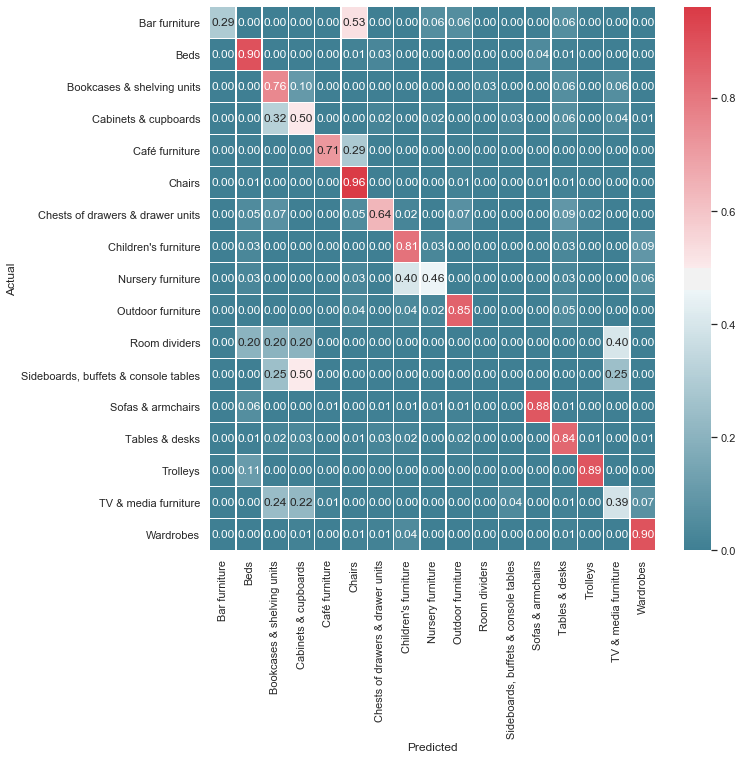

In [178]:
cm = confusion_matrix(y_true = y_test, y_pred=y_pred, labels=label) 

# number of samples that actually belong to each category
cm_sum = cm.sum(axis = 1)
cm1 = np.zeros((len(label),len(label)))

# confusion matrix divided by  number of samples in test set belongs to each category 
for k in range(len(label)):
    cm1[k,:] = cm[k,:]/cm_sum[k]

# confusion_matrix normalized 
cm_df = pd.DataFrame(cm1,index = label, columns=label)

# plot confusion matrix 
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cm_df, annot=True, linewidths=.5,ax=ax,fmt='.2f',cmap = cmap)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.figure.savefig('Figures/Decision_Trees/DT_CM_1.png', bbox_inches = 'tight')

The confusion matrix shows that the prediction works well for must categories. However, the decision tree performs poor for items of categories 'Room dividers' and 'Sideboards, buffets & console tables'. The prediction could also be improved for items of categories 'Bar furniture', 'Nursery furniturs' and 'TV & media furniture'. 

In [179]:
# determine training accuracy 
y_pred_train = tree_est.predict(X_train)
accuracy_train_1 = accuracy_score(y_train, y_pred_train)
print("Training accuracy:", round(accuracy_train_1,4))
# determine test accuracy
accuracy_test_1 = accuracy_score(y_test, y_pred)
print("Test accuracy:", round(accuracy_test_1,4))

Training accuracy: 0.8601
Test accuracy: 0.7697


### First Improvements of the Decision Tree

As a first attempt to improve the decision tree, all features with an importance of less than 2% are excluded from the set of predictors. This is the case for the following features: 'item_id', 'other_colors' and 'sellable_online'. For that, adjust the dataframe which is used to create the training and test dataset and then fit the decision tree to the new dataset ('learn_df_improvement').

In [180]:
learn = ['item_id','name','price','designer','depth','height','width','category','category_num' ]
learn_df_improvement = learn_df[learn]

In [181]:
predictors

['item_id',
 'name',
 'price',
 'sellable_online',
 'other_colors',
 'designer',
 'depth',
 'height',
 'width']

In [182]:
predictors.remove('item_id')
predictors.remove('other_colors')
predictors.remove('sellable_online')

In [183]:
X_train, X_test, y_train, y_test = test_train_dataset(learn_df_improvement, predictors, train_size, random_state)

In [184]:
clf = tree.DecisionTreeClassifier(min_samples_split=20)
tree_est = clf.fit(X_train, y_train)
y_pred = tree_est.predict(X_test)

#### Visualization of the Decision Tree

In [185]:
# use sklearn's export to generate the dot-data string file with all the nodes and their props.
# dot_data = tree.export_graphviz(tree_est, out_file='Figures/Decision_Trees/seat_tree_2.dot',feature_names=predictors, 
#                filled=True, rounded=True, special_characters=True) #class_names=['True', 'False']

# with open('Figures/Decision_Trees/seat_tree_2.dot') as f:
#    dot_graph = f.read()  

# create the source object
# I = graphviz.Source(dot_graph, format='png', engine='dot')
# Use ipython Image to shrink the rendered image of the source obj to fit into jupyter nb.
# Image(I.render())
# also show the view of the source object in browser so we can zoom in on nodes and see what we've got
# I.view()

#### Evaluation of the First Improvement

Again, in a first step the Gini Index of the individual features which were used as predictors are compared. Then the confusion matrix is created and the training and test accuracy is computed. 

In [186]:
feature_importances = tree_est.feature_importances_
pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], 
                                                                                                ascending=False)

Importance
depth       0.419714
height      0.295194
name        0.203369
price       0.033931
designer    0.024655
width       0.023136

The results are very similar to the results of the first decision tree. Again, 'depth' is the most important feature with slightly over 40%. 'depth' is followed by 'height' and 'name' which account to almost 30% and slightly over 20%, respectively. The features with the lowest importance are 'price', 'designer' and 'width'. As previously, again each account for less then 5%. 

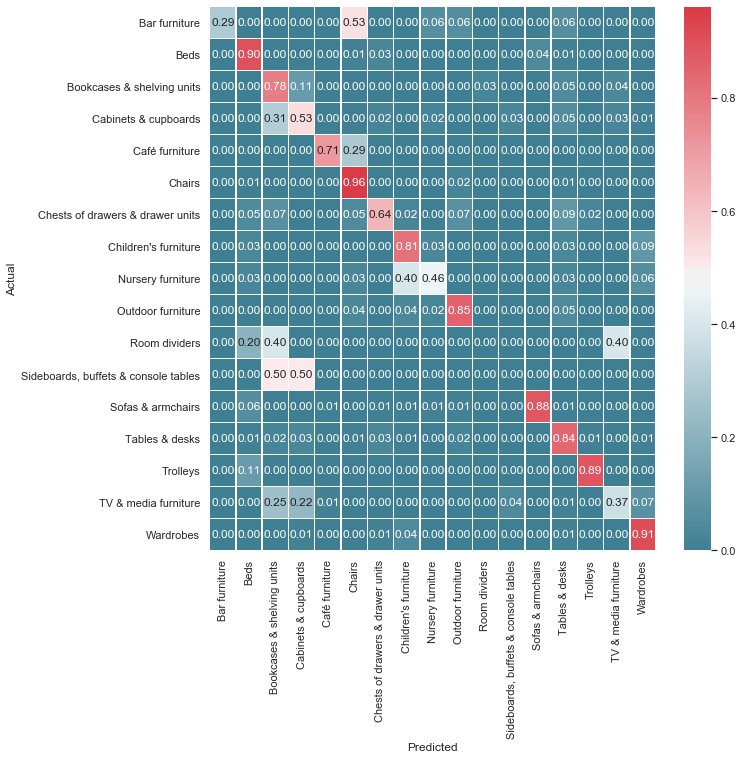

In [187]:
# Lets also get the training error rate of the tree model
cm = confusion_matrix(y_true = y_test, y_pred=y_pred, labels=label) 
#print(cmatrix)

# number of smaples actually belong to each category
cm_sum = cm.sum(axis = 1)

cm1 = np.zeros((len(label),len(label)))

# confusion matrix divided by  number of samples in test set belongs to each category 
for k in range(len(label)):
    cm1[k,:] = cm[k,:]/cm_sum[k]

# confusion_matrix normalized 
cm_df = pd.DataFrame(cm1,index = label, columns=label)

#plot confusion matrix 
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cm_df, annot=True, linewidths=.5,ax=ax,fmt='.2f',cmap = cmap)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.figure.savefig('Figures/Decision_Trees/DT_CM_2.png', bbox_inches = 'tight')

The confusion matrix is very similar to the one of the first decision tree. Although, the prediction was improved ever so slightly for some categories such as 'Cabinets and Cupboards' (+ 0.04), the decision tree still performs poorly when predicting the category of items that belong to the categories 'Room dividers' and 'Sideboards, buffets & console tables'. Also, the prediction accuracy of the following categories is not very satisfying as well: 'Bar furniture', 'Nursery furniture' and 'TV % media furniture'.

In [188]:
# determine training accuracy 
y_pred_train = tree_est.predict(X_train)
accuracy_train_2 = accuracy_score(y_train, y_pred_train)
improvement_train = round(((accuracy_train_2-accuracy_train_1)/accuracy_train_2)*100,2)
print("Training accuracy:", round(accuracy_train_2,4))
if improvement_train >0.0:
    print("The training accuracy improved by " +str(improvement_train)+ "%.\n")
elif improvement_train <0.0:
    print("The training accuracy deteriorated by " +str(improvement_train)+ "%.\n")
elif improvement_train == 0.0:
    print("No improvement of the training accuracy.")

# determine test accuracy
accuracy_test_2 = accuracy_score(y_test, y_pred)
print("Test accuracy:", round(accuracy_test_2,4))
improvement_test = round(((accuracy_test_2-accuracy_test_1)/accuracy_test_2)*100,2)
if improvement_test >0.0:
    print("The test accuracy improved by " +str(improvement_test)+ "%.\n")
elif improvement_test <0.0:
    print("The test accuracy deteriorated by " +str(improvement_test)+ "%.\n")
elif improvement_test == 0.0:
    print("No improvement of the test accuracy.\n")

Training accuracy: 0.8553
The training accuracy deteriorated by -0.57%.

Test accuracy: 0.7762
The test accuracy improved by 0.84%.



#### Replicate the Samples for a Small Sample Size

In the data analysis we found, that the sample size varies depending on the category. We noticed that especially for those categories, that have fewer samples, the decision tree performs poorly. In an effort to balance the sample size of categories with very few samples, some samples were replicated. 
Recall the sample size of the individual categories:

In [189]:
size_df = learn_df_improvement.groupby('category').size().reset_index(name='size')
size_df

category  size
0                          Bar furniture    47
1                                   Beds   208
2             Bookcases & shelving units   548
3                   Cabinets & cupboards   292
4                         Café furniture    26
5                                 Chairs   481
6       Chests of drawers & drawer units   125
7                   Children's furniture   124
8                      Nursery furniture    97
9                      Outdoor furniture   216
10                         Room dividers    13
11  Sideboards, buffets & console tables    23
12                     Sofas & armchairs   428
13                  TV & media furniture   190
14                        Tables & desks   612
15                              Trolleys    28
16                             Wardrobes   236

Remeber the confusion matrix after the first improvments: The prediction accuracy of the categories 'Sideboards, buffets & console tables', 'Room dividers' was significantly lower than for the other categories. Both categories have a very low number of samples compared to other categories such as 'Beds' where the prediction accuracy was 90%.

In [190]:
# careful here the order of the labels somehow changed compared to the list 'label' above. The order of TV & median furniture
# tables& dsks and trollyes somehow echanged as can be seen below . Thus, we cannot use the list label to display the correct order of 
# column names in this section.
label1 =size_df['category'].tolist()

if label!=label1:
    print('Label does not equal label1. In the following, therefore label1 will be used.')

Label does not equal label1. In the following, therefore label1 will be used.


In [191]:
learn_df_final = learn_df_improvement.copy(deep=True)

In [192]:
label_size = size_df['size'].tolist()
for k in range(len(label1)):
    temp_df = learn_df_improvement[learn_df_improvement['category'].str.contains(label1[k])] 
    tt = round(max(label_size)/label_size[k]) -1
    if tt > 0:
        temp_df_improvement = pd.concat([temp_df]*tt, ignore_index=True)
        learn_df_final = pd.concat([learn_df_final, temp_df_improvement] , ignore_index=True)
     

In [193]:
#new relative balanced data set with duplicated samples
size_df_final = learn_df_final.groupby('category').size().reset_index(name='size')
size_df_final

category  size
0                          Bar furniture   611
1                                   Beds   624
2             Bookcases & shelving units   548
3                   Cabinets & cupboards   584
4                         Café furniture   624
5                                 Chairs   481
6       Chests of drawers & drawer units   625
7                   Children's furniture   620
8                      Nursery furniture   582
9                      Outdoor furniture   648
10                         Room dividers   611
11  Sideboards, buffets & console tables   621
12                     Sofas & armchairs   428
13                  TV & media furniture   570
14                        Tables & desks   612
15                              Trolleys   616
16                             Wardrobes   708

By replicating samples for some categories, the number of samples of the dataset now is relatively balanced. However, note that by replicating samples now the categories which were lacking samples before now contain many duplicate samples.

### Final Version of the Decision Tree

Create a decision tree using the modified dataset 'learn_final'.

In [194]:
X_train, X_test, y_train, y_test = test_train_dataset(learn_df_final, predictors, train_size, random_state)

In [195]:
clf = tree.DecisionTreeClassifier(min_samples_split=20)
tree_est = clf.fit(X_train, y_train)
y_pred = tree_est.predict(X_test)

#### Visualization of the Decision Tree

In [196]:
# use sklearn's export to generate the dot-data string file with all the nodes and their props.
#dot_data = tree.export_graphviz(tree_est, out_file='Figures/Decision_Trees/seat_tree_3.dot',feature_names=predictors, 
#                filled=True, rounded=True, special_characters=True) #class_names=['True', 'False']



#with open('Figures/Decision_Trees/seat_tree_3.dot') as f:
#    dot_graph = f.read()  

# create the source object
#I = graphviz.Source(dot_graph, format='png', engine='dot')
# Use ipython Image to shrink the rendered image of the source obj to fit into jupyter nb.
#Image(I.render())
# also show the view of the source object in browser so we can zoom in on nodes and see what we've got
#I.view()

#### Evaluation of the Final Decision Tree

Again, in a first step the Gini Index of the individual features which were used as predictors are compared. Then the confusion matrix is created and the training and test accuracy is computed. 

In [197]:
feature_importances = tree_est.feature_importances_
feature_importances = pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], 
                                                                                                ascending=False)
feature_importances

Importance
name        0.382504
depth       0.277762
height      0.169087
price       0.068605
width       0.067609
designer    0.034432

Now, the most important feature is 'name' with almost 40% followed by the size-features 'depth', and 'height'. The features 'width', 'price' and 'designer' are not as important for the prediction of the feature 'category'. Each of them account for (significantly) less than 10%. 
The importance of the different features used to predict the category of an item are also displayed in tha bar-graph below in increasing order. 

Text(0.5, 1.0, 'Feature importance')

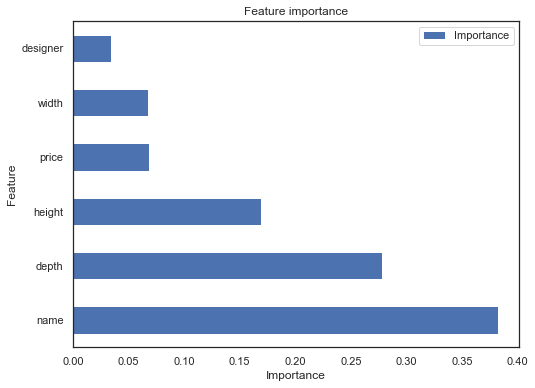

In [198]:
figip,axip = plt.subplots(1,1, figsize=(8,6))
feature_importances.plot(kind='barh', ax=axip)
axip.set_xlabel('Importance')
axip.set_ylabel('Feature')
axip.set_title('Feature importance')

Again the confusion matrix is created and the training and test accuracy is determined.

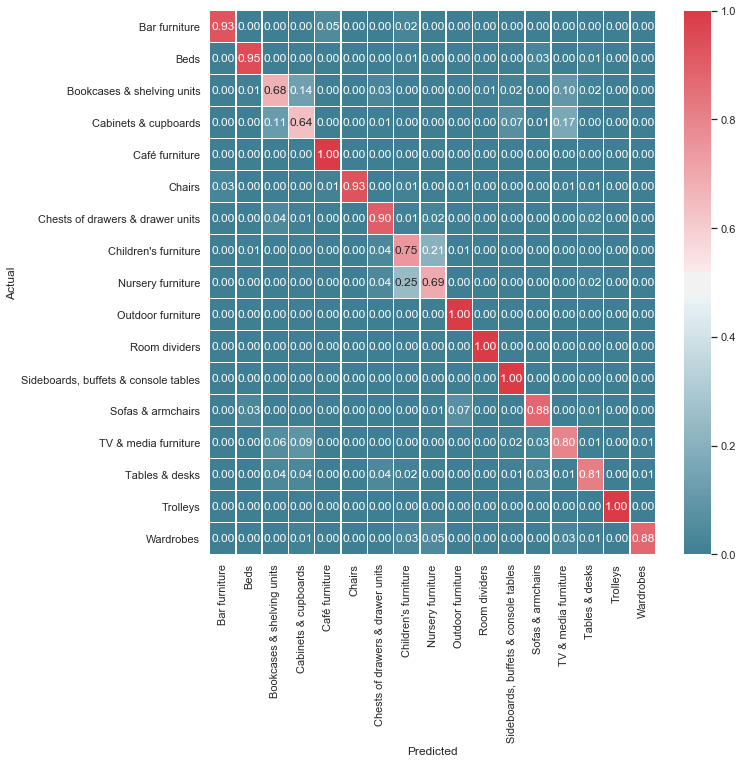

In [199]:
# get the confusion_matrix for the test dataset
cm = confusion_matrix(y_true = y_test, y_pred=y_pred, labels=label1) 
#print(cmatrix)

# number of smaples actually belong to each category
cm_sum = cm.sum(axis = 1)

cm1 = np.zeros((len(label1),len(label1)))

# confusion matrix divided by  number of samples in test set belongs to each category 
for k in range(len(label)):
    cm1[k,:] = cm[k,:]/cm_sum[k]

# confusion_matrix normalized 
cm_df = pd.DataFrame(cm1,index = label1, columns=label1)

# plot confusion matrix 
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cm_df, annot=True, linewidths=.5,ax=ax,fmt='.2f',cmap = cmap)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.figure.savefig('Figures/Decision_Trees/DT_CM_3.png', bbox_inches = 'tight')

It seems that by replicating samples for the categories with very few samples, the prediction was improved significantly. Now, the prediction accuracy is at least 64% for all categories. Still, the prediction for the categories which only had few samples is not as accurate as it is for categories which had a lot of samples such as 'Beds'. However, not all categories perform well just because the dataset included a lot of different samples. An example for that would be category 'Bookcases & shelving units'.\ 
The prediction works best for the following categories and even reaches an accuracy of  100%: 'Café furniture', 'Outdoor furniture', 'Room dividers', 'Sideboards, buffets &console tables', 'Trolleys'.

In [200]:
# calculate the training accuracy 
y_pred_train = tree_est.predict(X_train)
accuracy_train_3 = accuracy_score(y_train, y_pred_train)
improvement_train = round(((accuracy_train_3-accuracy_train_2)/accuracy_train_3)*100,2)
print("Model training accuracy:", accuracy_train_3)
if improvement_train >0.0:
    print("The training accuracy improved by" +str(improvement_train)+ '%.\n')
elif improvement_train <0.0:
    print("The training accuracy deteriorated by" +str(improvement_train)+ '%.\n')
elif improvement_train == 0.0:
    print("No improvement of the training accuracy.")
    
# calculate the test accuracy
accuracy_test_3 = accuracy_score(y_test, y_pred)
print("Model test accuracy:", accuracy_test_3)
improvement_test = round(((accuracy_test_3-accuracy_test_2)/accuracy_test_3)*100,2)
if improvement_test >0.0:
    print("The test accuracy improved by" +str(improvement_test)+ '%.\n')
elif improvement_test <0.0:
    print("The test accuracy deteriorated by" +str(improvement_test)+ '%.\n')
elif improvement_test == 0.0:
    print("No improvement of the test accuracy.\n")

Model training accuracy: 0.9101107011070111
The training accuracy improved by6.02%.

Model test accuracy: 0.8762732174955062
The test accuracy improved by11.42%.



### Further Investigations of the Decision Tree

Now we examine how the decision tree performs for different parameter settings. Using 'trial and error' we iteratively investigate the impact of the following parameters: 'max_depth', 'min_samples_split' and 'min_samples_leaf'. 

The parameter **'max_depth'** sets the maximum depth of the trees. Its default value is 'None'. Then, the nodes are expaded until all leaves are pure or until all leaves contain less than min_samples_split samples.\
The parameter **'min_samples_split'** defines the minimum number of samples needed to split the tree. This value was previously set to 20. Now we wil investigate, how this value influences the overall accuracy of the decision tree.\
The parameter **min_samples_leaf** defines the minimal number of samples to be at a leaf node. Thus, split points will only be considered if at least min_samples_leaf training samples are left in each of the branches.

The parameter **criterion** is by default the Gini Index. The Gini Index was used here to examine the importance of the different features used as predictors. Other criterions were not examined in this context.\
The parameter **splitter** is by default set to 'best'. Random splitting was not investigated in this context.

In [201]:
min_samples_split = [16,20,24,28,32,36,40,44]
min_samples_leaf = [1,3,5,7]

In [202]:
result = []

X_train, X_test, y_train, y_test = test_train_dataset(learn_df_final, predictors, train_size, random_state)

for min_leaf in min_samples_leaf:    
    for min_split in min_samples_split:
    
            start_time = time.time()
            
            clf =  tree.DecisionTreeClassifier(min_samples_split=min_split, min_samples_leaf = min_leaf)
            clf.fit(X_train,y_train)
            y_pred =  clf.predict(X_test)
            
            end_time = time.time() - start_time
            

            y_pred_train = tree_est.predict(X_train)
            accuracy_train = accuracy_score(y_train, y_pred_train)
            
            accuracy_test = accuracy_score(y_test, y_pred)
            
            #np.mean((y_test-y_pred)**2)
            
            feature_importances = tree_est.feature_importances_
            feature_importances = pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], 
                                                                                                ascending=False)
            
            result.append(
                {
                    'min_samples_split': min_split,
                    'min_samples_leaf': min_leaf ,
                    #'depth': d,
                    'time': end_time,
                    #'mse': mse,
                    'training accuracy': accuracy_train,
                    'test accuracy': accuracy_test,
                    'importance': feature_importances
                    }
                )
            
            print('===========Process for Param estimator min_samples_split %d, min_samples_leaf %d, depth %i, ===========' % (min_split, min_leaf, d))
            print('time consumption: '+ str(end_time))
            #print('Overall train acuracy: ' +str(accuracy_train))
            print('Overall test acuracy: ' +str(accuracy_test))
            #print('Overall mse: ' +str(mse)+ "\n")

===========Process for Param estimator min_samples_split 16, min_samples_leaf 1, depth 15, ===========
time consumption: 0.03483080863952637
Overall test acuracy: 0.8762732174955062
===========Process for Param estimator min_samples_split 20, min_samples_leaf 1, depth 15, ===========
time consumption: 0.025610923767089844
Overall test acuracy: 0.8723786698621929
===========Process for Param estimator min_samples_split 24, min_samples_leaf 1, depth 15, ===========
time consumption: 0.024770021438598633
Overall test acuracy: 0.8705811863391252
===========Process for Param estimator min_samples_split 28, min_samples_leaf 1, depth 15, ===========
time consumption: 0.02428913116455078
Overall test acuracy: 0.8666866387058119
===========Process for Param estimator min_samples_split 32, min_samples_leaf 1, depth 15, ===========
time consumption: 0.027670860290527344
Overall test acuracy: 0.8618933493109646
===========Process for Param estimator min_samples_split 36, min_samples_leaf 1, depth 

In [214]:
#result to pandas DataFrame
res = pd.DataFrame(result)

#search for the accuracy better than 0.8
best_list = []
best = 1000
ident = 0
for i in range(len(res)):
    tmp = res['time'][i]/res['test accuracy'][i]
    if best > tmp and res['test accuracy'][i] > 0.8:
        best = tmp
        ident = i
        best_list.append([i])

best_min_split =res['min_samples_split'][ident]
best_min_leaf = res['min_samples_leaf'][ident]
#d = res['depth'][ident]
accuracy_train = res['training accuracy'][ident]
accuracy_test = res['test accuracy'][ident]
time = res['time'][ident]
    
print("The best results are achieved with the following settings:\n\nmin_samples_split: %d\nmin_samples_leaf: %d\n\ntest accuracy: %4.3f\ntime consumption: %4.3f" % (best_min_split, best_min_leaf, accuracy_test, time))


The best results are achieved with the following settings:

min_samples_split: 16
min_samples_leaf: 3

test accuracy: 0.874
time consumption: 0.024


In [ ]:
result = []
acc_gini = []
acc_entropy = []

X_train, X_test, y_train, y_test = test_train_dataset(learn_df_final, predictors, train_size, random_state)

for min_leaf in min_samples_leaf: 
    
    ## gini
    clf =  tree.DecisionTreeClassifier(min_samples_split=best_min_split, min_samples_leaf = min_leaf, criterion = 'gini')
    clf.fit(X_train,y_train)
    y_pred =  clf.predict(X_test)
    
    acc_gini = acc_gini.append(accuracy_score(y_test, y_pred_test))
    
    ## entropy
    clf =  tree.DecisionTreeClassifier(min_samples_split=best_min_split, min_samples_leaf = min_leaf, criterion = 'entropy')
    clf.fit(X_train,y_train)
    y_pred =  clf.predict(X_test)
    acc_entropy = acc_entropy.append(accuracy_score(y_test, y_pred))

    
result = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'min_samples_leaf':pd.Series(min_samples_leaf)})

# visualizing changes in parameters
plt.plot('min_samples_leaf','acc_gini', data=d, label='gini')
plt.plot('min_samples_leaf','acc_entropy', data=d, label='entropy')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
for min_split in min_samples_split:

        clf =  tree.DecisionTreeClassifier(min_samples_split=min_split, min_samples_leaf = best_min_leaf, criterion='gini')
        clf.fit(X_train,y_train)
        y_pred =  clf.predict(X_test)
        acc_gini = acc_gini.append(accuracy_score(y_test, y_pred))

        clf =  tree.DecisionTreeClassifier(min_samples_split=min_split, min_samples_leaf = best_min_leaf, criterion='entropy')
        clf.fit(X_train,y_train)
        y_pred =  clf.predict(X_test)
        acc_entropy = acc_entropy.append(accuracy_score(y_test, y_pred))

        
result = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'min_samples_split':pd.Series(min_samples_split)})

# visualizing changes in parameters
plt.plot('min_samples_split','acc_gini', data=d, label='gini')
plt.plot('min_samples_split','acc_entropy', data=d, label='entropy')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.legend()
plt.show()

With an increasing depth, the accuracy increases as well. However, by increasing the max_depth, the computation time rises as well.\
The parameter **_min_samples_leaf** does not seem to have a large impact on the accuracy of the decision tree. Still, the smaller min_samples_leaf, the higher the accuracy of the decision tree. However, the smaller min_samples_leaf, the larger the computation time.\
With an increasing increasing parameter **min_samples_split** the accuracy increases as well until min_samples_split = 24-28 is reached. Then the accuracy decreases again. Overall the best result is achieved when max_depth=15, min_samples_split = 28 and min_samples_leaf.

In this case, we will not check the single confusion matrix again as the dataset now is balanced w.r.t sample size of each category.

#### Pruning

To overcome the drawback of the previous methodology, we can create a smaller tree with
fewer splits (fewer regions) which might lead to lower variance and better interpretation at
the cost of a little bias.
• Build the tree only so long as the decrease in the RSS due to each split exceeds some (high)
threshold.
{ This strategy builds a smaller tree, but it may be that a worthless split early in the tree is followed by
a very good split (a split may lead to a large reduction of the RSS later on).
• Better strategy: grow a very large tree T0, and then prune it back in order to obtain a
subtree.
• How to determine the best way to prune a tree?

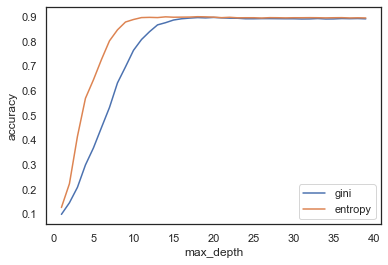

In [208]:
max_depth = []
acc_gini = []
acc_entropy = []

depth = range(1,40)

X_train, X_test, y_train, y_test = test_train_dataset(learn_df_final, predictors, train_size, random_state)

for i in depth:
    
    max_depth.append(i)
    
    clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)  
    acc_gini.append(accuracy_score(y_test, y_pred))
    
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_entropy.append(accuracy_score(y_test, y_pred))

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Random Forest

## Create a Random Forest

At first, we take look at an example calssifier. This example classifier is almost a standard random forest classifier except that the parameter min_samples_leaf is set to 5.

**Note**: The exact value of overall accuracy, accuracy in confusion matrix and even the ranking of the feature importance might slightly differ from the ones written in the comments because of the randomness in the algorithm.

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time

### Create a First Version of a Random Forest

In a first step, the dataset 'learn_df' is split into a test- and training-dataset. After fitting the random forest classifier to the training-dataset and then use the test-dataset to test the model. 

In [113]:
X_train, X_test, y_train, y_test = train_test_split(learn_df.drop(columns = ['category','category_num']), \
                                                    learn_df['category_num'], train_size=0.67, random_state=1)

rf =  RandomForestClassifier(min_samples_leaf= 5)
rf_est = rf.fit(X_train,y_train)
y_pred =  rf.predict(X_test)

a = accuracy_score(y_test, y_pred)
print('Overall accuracy of all category: ' +str(round(a,4)))

Overall accuracy of all category: 0.8107


**Note** : This overall acuracy is not weighted by sample size , so even for a category with a small size where the performance is really bad, we still have an acceptable overall accuracy.

#### Evaluation of this First Version of a Random Forest

In order to evaluate the performance of this first random forste model the importance of the individual features are compared.

In [114]:
feature_impo = pd.Series(data=rf_est.feature_importances_, index=list(X_train.columns))
feature_impo = feature_impo.sort_values(axis=0, ascending=False)
feature_impo

depth              0.299516
height             0.259642
name               0.217743
width              0.073412
price              0.057942
designer           0.055379
other_colors       0.018729
item_id            0.017628
sellable_online    0.000010
dtype: float64

Text(0.5, 1.0, 'Feature importance')

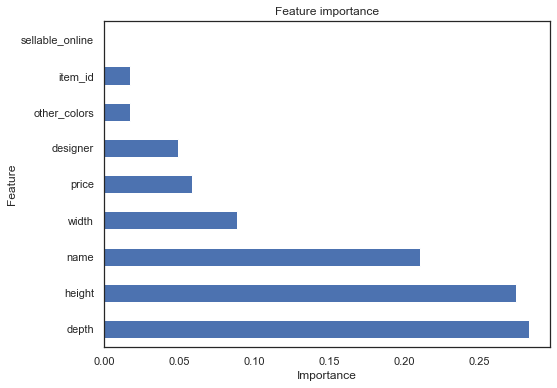

In [89]:
figip,axip = plt.subplots(1,1, figsize=(8,6))
feature_impo.plot(kind='barh', ax=axip)
axip.set_xlabel('Importance')
axip.set_ylabel('Feature')
axip.set_title('Feature importance')

The bar-graph shows the importance of the individual features in increasing order. The most important features are 'depth' and 'height' with approx. 30% and 26%, respectively. As expected, again, sellable_online does not have any importance.   

Now lets check the confusion matrix to examine the acuracy for the individual categories:

In [115]:
#confusion matrix
cm =  confusion_matrix(y_test, y_pred)

# number of smaples actually belong to each category
cm_sum = cm.sum(axis = 1)

cm1 = np.zeros((17,17))

# confusion matrix divided by  number of samples in test set belongs to each category 
for k in range(17):
    cm1[k,:] = cm[k,:]/cm_sum[k]

# confusion_matrix normalized 
cm_df = pd.DataFrame(cm1,index = label, columns=label)

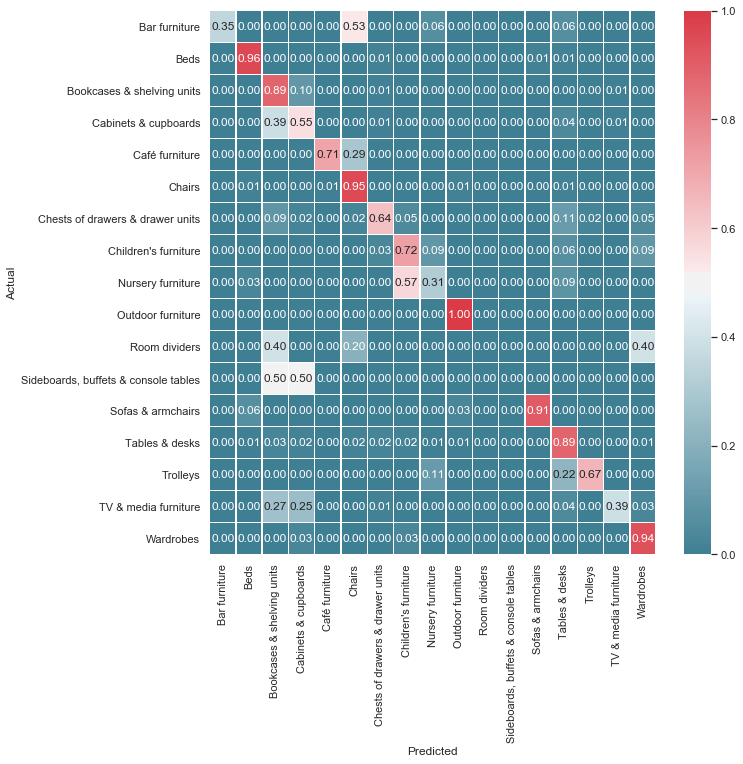

In [116]:
#plot confusion matrix 
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cm_df, annot=True, linewidths=.5,ax=ax,fmt='.2f',cmap = cmap)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.figure.savefig('Figures/Random_Forest/RF_CM_1.png', bbox_inches = 'tight')

An analysis of this confusion matrix will be given later; toghether with the next plot.

### First Improvements of the Random Forest
First improvement by further selection of the features by only keeping the important features.
From feature importance report we get that size data  play the  great role in prediction, as we asuumed before in feature analysis. In addition name of the items is also important. Lets see what happens if we just keep those 5 top features with importance  larger than around 5%. We remove the feature **sellable online**, **item_id** and **other_colors**.

In [117]:
# we need item_id and category in dataframe for other use, not for training
learn1 = ['item_id','height','depth','width','name','designer','category','category_num']
learn_df1 = learn_df[learn1]

In [118]:
# split the data into test and training data-set
X_train, X_test, y_train, y_test = train_test_split(learn_df1.drop(columns = ['item_id','category','category_num']), \
                                                    learn_df1['category_num'], random_state=1)
# create random forest
rf =  RandomForestClassifier(min_samples_leaf= 5)
rf_est = rf.fit(X_train,y_train)
y_pred =  rf.predict(X_test)
a = accuracy_score(y_test, y_pred)
print('Overall acuracy of all category: ' +str(a))

Overall acuracy of all category: 0.8192640692640693


The overall acuracy increased from about 80% to 82%

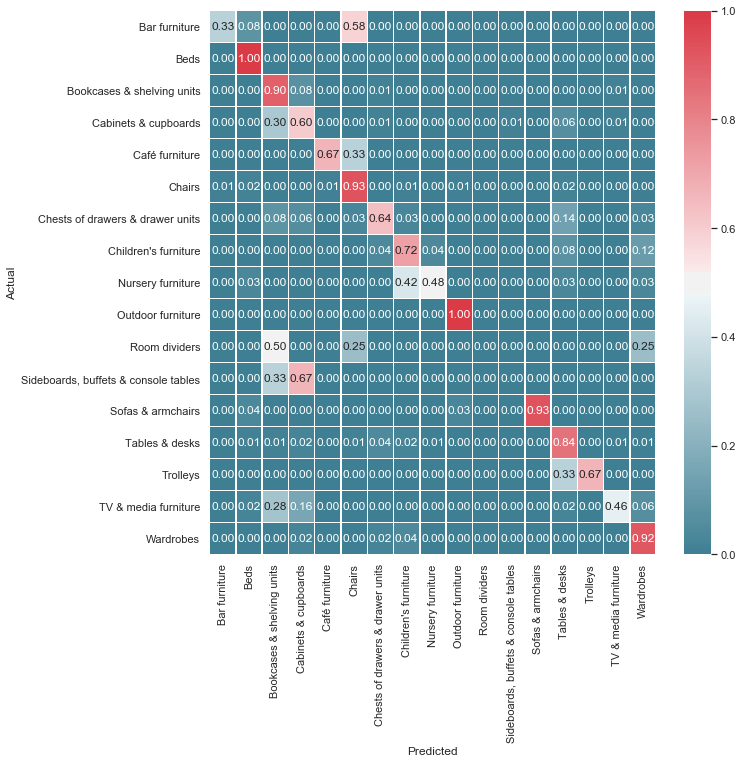

In [94]:
#confusion matrix
cm =  confusion_matrix(y_test, y_pred)

# number of smaples actually belong to each category
cm_sum = cm.sum(axis = 1)

cm1 = np.zeros((17,17))

# confusion matrix divided by  number of samples in test set belongs to each category 
for k in range(17):
    cm1[k,:] = cm[k,:]/cm_sum[k]

# confusion_matrix normalized 
cm_df = pd.DataFrame(cm1,index = label, columns=label)

#plot confusion matrix 
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cm_df, annot=True, linewidths=.5,ax=ax,fmt='.2f',cmap = cmap)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.figure.savefig('Figures/Random_Forest/RF_CM_2.png', bbox_inches = 'tight')

Compare the both confusion matrix we get that through feature selection,  we increase the overall accuracy at about1%  in the way that the accuracy for category Nursury furniture have been significantly increased by 10% respectly. And it is clear that the category with the worst performance: Room diveider with 0%, Sideboards & console tables with 0%, then Bar furniture 42%. Those are exactly the category with smallest sample size in whole dataset. As we mentioned above we can replicate  those samples to make it to a  ralative balanced multi-class classification task. The category TV & media furniture perform also not good, 30% TV& medianfurnitures have been predicted as Book cases & shelving unit. Considering the feature importance and boxplot of height and depth, we find that those two category have really simillar distribution shown in boxplot of those top 2 features.No wonder then.To our supprise, category Trolleys ,of which samples size is just 28, has the outstanding performance. We did not find the obvious clue from  its size  and price. We take look at the data set and find  the option for its name and designer is restricted and this might be the reason.  

### Final Version of the Random Forest
Improve the results by replicating the samples for the categories with a small sample size. This is the case for the following categories: **Room dividers** and **Sideboards, buffets & console tables**.
The categories with small sample sizes in the dataset are replicated in order to make this multi class classification task be relativly balanced. As the results will prove, the accuracy of the model can be increased significantly by doing so.

In [95]:
#recall the sample size of each category
size_df = learn_df1.groupby('category').size().reset_index(name='size')
size_df

category  size
0                          Bar furniture    47
1                                   Beds   208
2             Bookcases & shelving units   548
3                   Cabinets & cupboards   292
4                         Café furniture    26
5                                 Chairs   481
6       Chests of drawers & drawer units   125
7                   Children's furniture   124
8                      Nursery furniture    97
9                      Outdoor furniture   216
10                         Room dividers    13
11  Sideboards, buffets & console tables    23
12                     Sofas & armchairs   428
13                  TV & media furniture   190
14                        Tables & desks   612
15                              Trolleys    28
16                             Wardrobes   236

In [96]:
# careful here the order of the labels somehow changed compared to the list 'label' above. The order of TV & median furniture
# tables& dsks and trollyes somehow echanged as can be seen below . Thus, we cannot use the list label to display the correct order of 
# column names in this section.
label1 =size_df['category'].tolist()
if label != label1:
    print('label does not equal label1. In the following, therefore label1 will be used.')

label does not equal label1. In the following, therefore label1 will be used.


In [97]:
label_size = size_df['size'].tolist()
label_size

[47, 208, 548, 292, 26, 481, 125, 124, 97, 216, 13, 23, 428, 190, 612, 28, 236]

In [98]:
learn_df2 = learn_df1.copy() 

In [99]:
# using label1 instead of label!
#print(learn_df2.shape[0])
for k in range(17):
    temp_df = learn_df1[learn_df1['category'].str.contains(label1[k])] 
    #print('original size' + str(temp_df.shape[0]))
    #print('label_size' +str(label_size[k]))
    tt = round(max(label_size)/label_size[k]) -1
    #print('to replicate' + str(tt))
    if tt > 0:
        temp_df1 = pd.concat([temp_df]*tt, ignore_index=True)
        #print('df_repl size' +str(temp_df1.shape[0]))
        learn_df2 = pd.concat([learn_df2, temp_df1] , ignore_index=True)
        #print(learn_df2.shape[0])

In [100]:
# old dataset imbalanced
size_df

category  size
0                          Bar furniture    47
1                                   Beds   208
2             Bookcases & shelving units   548
3                   Cabinets & cupboards   292
4                         Café furniture    26
5                                 Chairs   481
6       Chests of drawers & drawer units   125
7                   Children's furniture   124
8                      Nursery furniture    97
9                      Outdoor furniture   216
10                         Room dividers    13
11  Sideboards, buffets & console tables    23
12                     Sofas & armchairs   428
13                  TV & media furniture   190
14                        Tables & desks   612
15                              Trolleys    28
16                             Wardrobes   236

In [101]:
#new relative balanced data set with duplicated samples
size_df2 = learn_df2.groupby('category').size().reset_index(name='size')
size_df2

category  size
0                          Bar furniture   611
1                                   Beds   624
2             Bookcases & shelving units   548
3                   Cabinets & cupboards   584
4                         Café furniture   624
5                                 Chairs   481
6       Chests of drawers & drawer units   625
7                   Children's furniture   620
8                      Nursery furniture   582
9                      Outdoor furniture   648
10                         Room dividers   611
11  Sideboards, buffets & console tables   621
12                     Sofas & armchairs   428
13                  TV & media furniture   570
14                        Tables & desks   612
15                              Trolleys   616
16                             Wardrobes   708

Now that the data-set has been modified, the samples are relatively balanced - even though there are many duplicated samples for the categories that only had very few samples before.
Thus in a next step, the final version of the random forest can be created. 

In [102]:
X_train, X_test, y_train, y_test = train_test_split(learn_df2.drop(columns = ['item_id','category','category_num']), \
                                                    learn_df2['category_num'], random_state=1)
rf =  RandomForestClassifier(min_samples_leaf= 5)
rf_est = rf.fit(X_train,y_train)
y_pred =  rf.predict(X_test)
a = accuracy_score(y_test, y_pred)
print('Overall acuracy of all category: ' +str(a))

Overall acuracy of all category: 0.8904705417160933


Despite the replicated samples, we were able to increase the overall accuracy from about 82% to 89%.

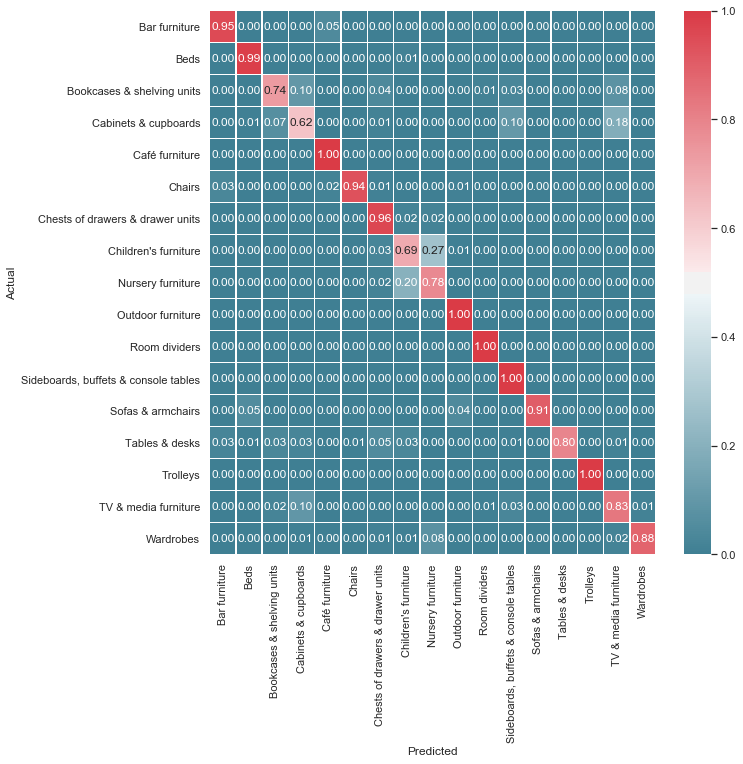

In [103]:
#confusion matrix
cm =  confusion_matrix(y_test, y_pred)

# number of smaples actually belong to each category
cm_sum = cm.sum(axis = 1)

cm1 = np.zeros((17,17))

# confusion matrix divided by  number of samples in test set belongs to each category 
for k in range(17):
    cm1[k,:] = cm[k,:]/cm_sum[k]

# confusion_matrix normalized 
cm_df = pd.DataFrame(cm1,index = label, columns=label)

#plot confusion matrix 
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cm_df, annot=True, linewidths=.5,ax=ax,fmt='.2f',cmap = cmap)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.figure.savefig('Figures/Random_Forest/RF_CM_3.png', bbox_inches = 'tight')

Now we have an almost perfect diagonal matrix we desired. Through repeating samples to make size of each category  balanced,  the acuracy of prediction for Bar funiture has been increased from 42% to 95% ,  for Room dividers from 0% to 100%,  for Sideboards, buffets & console rable from 0% to 100% etc. It is still hard for the algorithm to distinguish nursery furniture from children furniture.The reason is clear that consering two the immportant features: height and depth, the distribution are almost the same in the box plot.  

In [104]:
feature_impo = pd.Series(data=rf_est.feature_importances_, index=list(X_train.columns))
feature_impo = feature_impo.sort_values(axis=0, ascending=False)
feature_impo

name        0.299422
depth       0.277490
height      0.241848
width       0.104116
designer    0.077123
dtype: float64

And now with replicated samles in data set , the feature name(former) becomes the most important feature, followed by height (former top1) and depth(former top2).

### Further Investigations of the Random Forest Model

 Now we try out different parameter settings to see if we can get better predictions. After trail and error we keep the following parameter sets to show the impact of those parameters. Best minimum samples in leaf  is  1 (we set 5 before), if increase the size the overall predictions accuracy goes down. Normally the acurracy increase with the size of forest until  reaching certain threshold and the accuracy become stable. In total those parameters just influence the overall acuracy less than 0.01, and the best overall accuracy witih random forest is about 90.27% for minimum_samples_leaf =1, n_tree = 400. Here we won't check the single confusion matrix, since the dataset is now balanced w.r.t sample size of each category. 

In [105]:
def RandomForest(n_tree, min_leaf, learn_df):
    
    X_train, X_test, y_train, y_test = train_test_split(learn_df.drop(columns = ['category_num','category','item_id']), \
                                                        learn_df['category_num'], random_state=1)
    print('==================='+'Process for Param_'+str(i)+'_'+ str(l)+'===================')
    start_time = time.time()
    rf =  RandomForestClassifier(n_estimators = n_tree,criterion = 'gini', min_samples_leaf = min_leaf,random_state =1)
    rf.fit(X_train,y_train)
    y_pred =  rf.predict(X_test)
    end_time = time.time()
    print('time consumption: '+ str(end_time - start_time))
    # overall accuracy
    a = accuracy_score(y_test, y_pred)
    print('Overall accuracy: ' +str(a))
# uncomment all below to check the confusion matrix for each loop
#     # confusion matrix   
#     m =  confusion_matrix(y_test, y_pred)
#     #calculate total number of samples of each category in X_test
#     m_sum = m.sum(axis = 1)
#     m1 = np.zeros((17,17))
#     for k in range(17):
#          m1[k,:] = m[k,:]/m_sum[k]
#     m_df = pd.DataFrame(m1,index = label, columns=label)
#     #plot confusion matrix
#     fig, ax = plt.subplots(figsize=(10,10))
#     cmap = sns.diverging_palette(220, 10, as_cmap=True)
#     sns.heatmap(m_df, annot=True, linewidths=.5,ax=ax,fmt='.2f',cmap = cmap)
#     ax.set_xlabel('Predicted')
#     ax.set_ylabel('Actual')
#     ax.figure.savefig('Figures/RF_CM_Param_'+str(i)+ '_' + str(l) +'_'+str(round(a,3))+'_.jpg',bbox_inches = 'tight')

In [106]:
# number of the  decision tree in forest
n_tree = [20,50,100,200,400,600]
# those two criterion almost make no difference to overall acuracy,  too complicated to examine their impact on each category
# so just use the default gini index
#crit = ['gini','entropy']
# minimum number of samples in the leaf (end node)
min_leaf = [1,3,5,7]

In [107]:
for i in range(len(n_tree)):
        for l in range(len(min_leaf)):
            RandomForest(n_tree[i], min_leaf[l],learn_df2)

===================Process for Param_0_0===================
time consumption: 0.1791989803314209
Overall accuracy: 0.8983788058521155
===================Process for Param_0_1===================
time consumption: 0.1664409637451172
Overall accuracy: 0.8952155001977066
===================Process for Param_0_2===================
time consumption: 0.15440106391906738
Overall accuracy: 0.8908659549228944
===================Process for Param_0_3===================
time consumption: 0.2389669418334961
Overall accuracy: 0.8805852115460656
===================Process for Param_1_0===================
time consumption: 0.49186086654663086
Overall accuracy: 0.9023329379201266
===================Process for Param_1_1===================
time consumption: 0.4410879611968994
Overall accuracy: 0.8940292605773033
===================Process for Param_1_2===================
time consumption: 0.38995981216430664
Overall accuracy: 0.8916567813364966
===================Process for Param_1_3===================

## Boosting

In [108]:
#get column names
ikea_cols = IKEA_df.columns

#get unique labels of data
labels = IKEA_df['category'].unique()

### Clean and convert Data-Set

In [109]:
#for each column of type string convert to integer
enc = preprocessing.LabelEncoder()

for col in ikea_cols:
    if isinstance(IKEA_df[col][1], str):
        IKEA_df[col] = IKEA_df[col].astype('str')
        IKEA_df[col] = enc.fit_transform(IKEA_df[col])#drop category for trainingsdata
X = IKEA_df.drop('category', axis=1)
X = X.loc[:, :'width']

#use category as label
y = IKEA_df['category']

#save cast from label to int label in dict    
label_convert = {}
label_int = IKEA_df['category'].unique()
for i in range(len(labels)):
    label_convert[label_int[i]] = labels[i] 

NameError: name 'preprocessing' is not defined

# Create Boosting 

We are exploring the method of Boosting in order to classify the IKEA Furniture Data-Set.

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time

## Create a First Version of Boosting

In [ ]:
# split data into test and training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=1)

#define parameters for Booster (experimented with parameters, use of best combination for time/performance ratio)
lr = 0.005
est = 5000
d = 10

#create booster
booster = GradientBoostingRegressor(loss='ls', learning_rate=lr, n_estimators=est, max_depth=d, random_state=0)

#fit booster
boost_est = booster.fit(X_train, y_train)

# Make predictions
y_pred = boost_est.predict(X_test)

#search for lowest correct prediction of second class = 1
low_class1=100
for i in range(len(y_pred)):
    if y_test.iloc[i] == 1:
        tmp = np.amin(y_pred[i])
        if tmp < low_class1:
            low_class1 = tmp
#assign every prediction lower to the first class = 0
for i in range(len(y_pred)):
    if y_pred[i] < low_class1:
        y_pred[i] = 0
        
#cast predictions to integer values
y_pred = [round(value) for value in y_pred]

#calculate accuracy
a = accuracy_score(y_test, y_pred)
# Note : this acuracy is not weighted by sample size!!! 
print('Overall acuracy of all category: ' +str(a))


#check feature importance
feature_impo = pd.Series(data=boost_est.feature_importances_, index=list(X_train.columns))
feature_impo = feature_impo.sort_values(axis=0, ascending=False)
feature_impo

In [ ]:
figip,axip = plt.subplots(1,1, figsize=(8,6))
feature_impo.plot(kind='barh', ax=axip)
axip.set_xlabel('Importance')
axip.set_ylabel('Feature')
axip.set_title('Feature importance')

Now lets check the confusion matrix to examine the acuracy for each category.

In [ ]:
#confusion matrix
cm =  confusion_matrix(y_test, y_pred)

# number of smaples actually belong to each category
cm_sum = cm.sum(axis = 1)

cm1 = np.zeros((len(cm),len(cm)))

# confusion matrix divided by  number of samples in test set belongs to each category 
for k in range(len(y_test.unique())):
    cm1[k,:] = cm[k,:]/cm_sum[k]

cm1 = cm1[0:len(y_test.unique()), 0:len(y_test.unique())]

# confusion_matrix normalized 
cm_df = pd.DataFrame(cm1,index = labels, columns=labels)

In [ ]:
#plot confusion matrix 
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cm_df, annot=True, linewidths=.5,ax=ax,fmt='.2f',cmap = cmap)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.figure.savefig('boost_CM1.png', bbox_inches = 'tight')

If we look at the confusion matrix, we see that we have problems to classify bar furniture, cabinets & cupboards,
nursery furniture, room dividers, tables & desks and television & media furniture. We were also unable to classify room dividers and sideboards correctly at all. Due to these classification errors we need do improve our model. 

## First Improvements of Boosting

First improvement by a new selection of only important features may lead to a better performance. From the feature importance we can see wether a feature is needed or not. Due to their importance, only features with an value larger than 0.03 are selected for the improvment step. The selected features are **heigth, width, short_description, link and depth**.

In [ ]:
#create list with features of good quality
improve = ['height','width','short_description','link' ,'depth', 'category']

#select important features
improveIKEA = IKEA_df[improve]

#drop category for trainingsdata
X = improveIKEA.drop('category', axis=1)

#use categroy as label
y = improveIKEA['category']

In [ ]:
# split data into test and training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=1)

#create booster
booster = GradientBoostingRegressor(loss='ls', learning_rate=lr, n_estimators=est, max_depth=d, random_state=0)

#fit booster
boost_est = booster.fit(X_train, y_train)

# Make predictions
y_pred = boost_est.predict(X_test)

#search for lowest correct prediction of second class = 1
low_class1=100
for i in range(len(y_pred)):
    if y_test.iloc[i] == 1:
        tmp = np.amin(y_pred[i])
        if tmp < low_class1:
            low_class1 = tmp
#assign every prediction lower to the first class = 0
for i in range(len(y_pred)):
    if y_pred[i] < low_class1:
        y_pred[i] = 0
        
#cast predictions to integer values
y_pred = [round(value) for value in y_pred]

#calculate accuracy
a = accuracy_score(y_test, y_pred)
# Note : this acuracy is not weighted by sample size!!! 
print('Overall acuracy of all category: ' +str(a))

#check feature importance
feature_impo = pd.Series(data=boost_est.feature_importances_, index=list(X_train.columns))
feature_impo = feature_impo.sort_values(axis=0, ascending=False)
feature_impo

The overall accuracy incresed due to our modifications from 64.3% to 68,9%.

In [ ]:
figip,axip = plt.subplots(1,1, figsize=(8,6))
feature_impo.plot(kind='barh', ax=axip)
axip.set_xlabel('Importance')
axip.set_ylabel('Feature')
axip.set_title('Feature importance')

We look again at the importance of the features to see if there are any major changes. From the data we can see that no value is below 0.03, which was the limit for selecting a feature in the first improvement step.

In [ ]:
#confusion matrix
cm =  confusion_matrix(y_test, y_pred)

# number of smaples actually belong to each category
cm_sum = cm.sum(axis = 1)

cm1 = np.zeros((len(cm),len(cm)))

# confusion matrix divided by  number of samples in test set belongs to each category 
for k in range(len(y_test.unique())):
    cm1[k,:] = cm[k,:]/cm_sum[k]

cm1 = cm1[0:len(y_test.unique()), 0:len(y_test.unique())]

# confusion_matrix normalized 
cm_df = pd.DataFrame(cm1,index = labels, columns=labels)

In [ ]:
#plot confusion matrix 
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cm_df, annot=True, linewidths=.5,ax=ax,fmt='.2f',cmap = cmap)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.figure.savefig('boost_CM2.png', bbox_inches = 'tight')

If we now compare the current confusion matrix with the first one, we see that most of the classifications improved. Only the classes bar furniture, cafe furniture and wardrobes remained the same. Unfortunately the accuracy for beds and nursery furniture decreased each by 3%. Again we were not able to corrctly predict the classes room dividers and sideboards at all. Based on the analysis of the composition of our data, it should be noted that the classes room dividers and sideboards are underrepresented in the data. The unchanged problematic class for bar furniture is also underrepresented. Due to the remaining classification errors we need do improve our model once again. 

In [ ]:
# determine training accuracy 
#y_pred_train = boost_est.predict(X_train)
#y_pred_train = [round(value) for value in y_pred_train]
#accuracy_train_1 = accuracy_score(y_train, y_pred_train)
#print("Model training accuracy:", accuracy_train_1)


# determine test accuracy
#accuracy_test_1 = accuracy_score(y_test, y_pred)
#print("Model test accuracy:", accuracy_test_1)

## Final Version of Boosting

In [ ]:
#recall the sample size of each category
size_df = improveIKEA.groupby('category').size().reset_index(name='size')
size_df.replace({'category': label_convert})

In [ ]:
#save number of unique labels
label_size = size_df['size'].tolist()
label_size

In [ ]:
#copy data
improveIKEA2 = improveIKEA.copy() 


#serach for label in data and check relative frequency
for k in range(len(labels)):
    temp_df = improveIKEA.loc[improveIKEA['category'] == k]
    #print('original size' + str(temp_df.shape[0]))
    #print('label_size' +str(label_size[k]))
    tt = round(max(label_size)/label_size[k]) -1
    #print('to replicate' + str(tt))
    if tt > 0:
        temp_df1 = pd.concat([temp_df]*tt, ignore_index=True)
        #print('df_repl size' +str(temp_df1.shape[0]))
        improveIKEA2 = pd.concat([improveIKEA2, temp_df1] , ignore_index=True)
        #print(learn_df2.shape[0])

size_df2 = improveIKEA2.groupby('category').size().reset_index(name='size')
size_df2.replace({'category': label_convert})

In [ ]:
#drop category for trainingsdata
X = improveIKEA2.drop('category', axis=1)

#use categroy as label
y = improveIKEA2['category']

# split data into test and training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=1)

#create booster
booster = GradientBoostingRegressor(loss='ls', learning_rate=0.001, n_estimators=5000, max_depth=15, random_state=0)

#fit booster
boost_est = booster.fit(X_train, y_train)

# Make predictions
y_pred = boost_est.predict(X_test)

#search for lowest correct prediction of second class = 1
low_class1=100
for i in range(len(y_pred)):
    if y_test.iloc[i] == 1:
        tmp = np.amin(y_pred[i])
        if tmp < low_class1:
            low_class1 = tmp
#assign every prediction lower to the first class = 0
for i in range(len(y_pred)):
    if y_pred[i] < low_class1:
        y_pred[i] = 0

#cast predictions to integer values
y_pred = [round(value) for value in y_pred]

#calculate accuracy
a = accuracy_score(y_test, y_pred)
# Note : this acuracy is not weighted by sample size!!! 
print('Overall acuracy of all category: ' +str(a))

#check feature importance
feature_impo = pd.Series(data=boost_est.feature_importances_, index=list(X_train.columns))
feature_impo = feature_impo.sort_values(axis=0, ascending=False)
feature_impo

In [ ]:
figip,axip = plt.subplots(1,1, figsize=(8,6))
feature_impo.plot(kind='barh', ax=axip)
axip.set_xlabel('Importance')
axip.set_ylabel('Feature')
axip.set_title('Feature importance')

In [ ]:
#confusion matrix
cm =  confusion_matrix(y_test, y_pred)

# number of smaples actually belong to each category
cm_sum = cm.sum(axis = 1)

cm1 = np.zeros((len(cm),len(cm)))

# confusion matrix divided by  number of samples in test set belongs to each category 
for k in range(len(y_test.unique())):
    cm1[k,:] = cm[k,:]/cm_sum[k]

cm1 = cm1[0:len(y_test.unique()), 0:len(y_test.unique())]

# confusion_matrix normalized 
cm_df = pd.DataFrame(cm1,index = labels, columns=labels)

In [ ]:
#plot confusion matrix 
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cm_df, annot=True, linewidths=.5,ax=ax,fmt='.2f',cmap = cmap)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.figure.savefig('boost_CM3.png', bbox_inches = 'tight')

The final version with the adjusted distribution of all classes improved the predictive power a lot. Now we can see a diagonal matrix that we need. Unfortunately the class for bookcases & shelvin units could not be improved and remains at a prediction level of 57%. Every others class performance increased except of the class for sofas & armchairs. This class lost 9% of its predictability. 

In [ ]:
# determine training accuracy 
y_pred_train = boost_est.predict(X_train)
y_pred_train = [round(value) for value in y_pred_train]
accuracy_train_2 = accuracy_score(y_train, y_pred_train)
print("Model training accuracy:", accuracy_train_2)


# determine test accuracy
accuracy_test_2 = accuracy_score(y_test, y_pred)
print("Model test accuracy:", accuracy_test_2)

In [ ]:
def train(X_train, X_test, y_train, y_test, boost):    

    booster = boost
    
    boost_est = booster.fit(X_train, y_train)
    
    
    # Examine the feature importances
    feature_importances = pd.Series(data=boost_est.feature_importances_, index=list(X_train.columns))
    sorted_feature_importances = feature_importances.sort_values(axis=0, ascending=False)
    #print(sorted_feature_importances)
    
    # Make predictions
    y_pred = boost_est.predict(X_test)
    
    # compute test mse
    mse = np.mean((y_test-y_pred)**2)
    #print("Test MSE = ", mse)
    
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    return mse, accuracy, sorted_feature_importances, boost_est, y_pred

## Further Investigations of Boosting Model

In [ ]:
estimator = [5000, 7500, 10000]
learning_rate = [0.01, 0.005, 0.001]
depth = [5, 15] 

In [ ]:
#result = pd.Dataframe(columns=["learning rate", "estimators", "depth", "time", "mse", "accuracy", "importance"])
result = []

#run through all parameters to find best solution
for lr in learning_rate:
    for est in estimator:
        for d in depth:
            #print("Run lr: %4.3f, estimator: %d, depth: %d" % (lr, est, d))
            start_time = time.time()
            booster = GradientBoostingRegressor(loss='ls', learning_rate=lr, n_estimators=est, max_depth=d, random_state=0)
            mse, accuracy, sorted_feature_importances, boost_est, y_pred = train(X_train, X_test, y_train, y_test, booster) 
            end_time = time.time() - start_time
            #save results
            result.append(
                {
                    'learning rate': lr,
                    'estimators': est ,
                    'depth': d,
                    'time': end_time,
                    'mse': mse,
                    'accuracy': accuracy,
                    'importance': sorted_feature_importances
                    }
                )
            print('===========Process for Param estimator %d, lr %4.3f, depth %i, ===========' % (est, lr, d))
            print('time consumption: '+ str(end_time))
            print('Overall acuracy: ' +str(accuracy))
            print('Overall mse: ' +str(mse)+ "\n")

In [ ]:
#result to pandas DataFrame
res = pd.DataFrame(result)

#search for the accuracy better than 0.8
best_list = []
best = 1000
ident = 0
for i in range(len(res)):
    tmp = res['time'][i]/res['accuracy'][i]
    if best > tmp and res['accuracy'][i] > 0.8:
        best = tmp
        ident = i
        best_list.append([i])

est =res['estimators'][ident]
lr = res['learning rate'][ident]
d = res['depth'][ident]
accuracy = res['accuracy'][ident]
time = res['time'][ident]
    
print("depth: %d, lr: %4.3f, depth: %i, accuracy: %4.3f, time consumption: %i" % (est, lr, d, accuracy, time))

### Conclusion